# 개요
- 서울대 인문학연구원 발간 "인문논총"(2025년 5월) 게재 논문 관련
- 기본 입력 파일: JDH_Data_new.xlsx

# 진단학보 발간 정보
- 발행 연월 달력에서 1~14호 표시하기

In [2]:
# 필요한 라이브러리 가져오기

import pandas as pd # pandas: 표 형식 데이터 처리용 라이브러리, pd로 사용
import re # re: 정규 표현식 라이브러리, 문자열 검색 및 수정용
import math # math: 수학 계산 함수 모음

import matplotlib.pyplot as plt # matplotlib.pyplot: 그래프 생성용, plt로 사용
import matplotlib as mpl # matplotlib: 그래프 스타일 및 설정 변경용, mpl로 사용
import matplotlib.font_manager as fm # matplotlib.font_manager: 그래프 글꼴 관리용, fm으로 사용
#font_name = 'Malgun Gothic'  # 윈도우 사용자 예시 (본인 환경에 맞게 수정)
font_name = 'NanumGothic' # 나눔고딕 사용 예시

In [3]:
#!pip install openpyxl

In [4]:
# 새로 업로드된 Excel 파일 구조 검사를 위해 파일 로드
file_path = 'data/JDH_Data_new.xlsx' # 'data' 폴더 내 'JDH_Data.xlsx' 파일 경로 저장
jdh_data = pd.ExcelFile(file_path) # pandas로 Excel 파일 열기, jdh_data에 저장

# 새 파일 구조 이해를 위해 시트 이름 표시
jdh_data.sheet_names # jdh_data (Excel 파일) 내 모든 시트 이름 출력

['Term59', 'Ph59', 'Foot59', 'Pub77(59)', 'RowInfo']

In [5]:
# 'RowInfo' 시트를 DataFrame으로 로드
rowinfo_data = jdh_data.parse('RowInfo') # jdh_data (앞서 열었던 Excel 파일)에서 'RowInfo' 시트를 읽어와서 rowinfo_data라는 표(DataFrame)로 저장

# 로드된 데이터의 처음 몇 줄 확인
rowinfo_data.head() # rowinfo_data 표의 맨 위 5줄을 화면에 바로 출력 (내용 미리보기)

,No,RawID,GisaId,Auth,AuthM,AuthO,Tran,TranM,Cat,Title,TitM,Pub,PubM,VolI,Publ,Date,SPage,EPage,ClsR,ClsUseR
0,1,CHDA_001_01,이병도(jdh193411a),李丙燾,이병도,NaN,NaN,NaN,논술,三韓問題의 新考察(一)-辰國及三韓考-,삼한문제의 신고찰(1)-진국 및 삼한고-,震檀學報,진단학보,1,震檀學會,19341100,1,25,R,UR
1,2,CHDA_001_02,이상백(jdh193411),李相佰,이상백,NaN,NaN,NaN,논술,庶孽 差待의 淵源에 對한 一問題,서얼 차대의 연원에 대한 일문제,震檀學報,진단학보,1,震檀學會,19341100,26,55,R,UR
2,3,CHDA_001_03,조윤제(jdh193411),趙潤濟,조윤제,NaN,NaN,NaN,논술,朝鮮詩歌의 胎生,조선시가의 태생,震檀學報,진단학보,1,震檀學會,19341100,56,85,R,UR
3,4,CHDA_001_04,김상기(jdh193411),金庠基,김상기,NaN,NaN,NaN,논술,古代의 貿易形態와 羅末의 海上發展에 就하야 (一)-淸海鎭大使張保皐를 主로 하야-,고대 무역형태와 나말의 해상발전에 취하야(1)-청해진대사장보고를 주로 하야-,震檀學報,진단학보,1,震檀學會,19341100,86,112,R,UR
4,5,CHDA_001_05,이병기(jdh193411),李秉岐,이병기,NaN,NaN,NaN,논술,時調의 發生과 歌曲과의 區分,시조의 발생과 가곡의 구분,震檀學報,진단학보,1,震檀學會,19341100,113,144,R,NaN


In [6]:
# 달력의 연도와 월 범위 정의
years = list(range(1934, 1942))  # 사용할 연도 범위 (1934년부터 1941년까지)
months = list(range(1, 13))     # 사용할 월 범위 (1월부터 12월까지)

# 'Date' 컬럼에서 'YearMonth' 정보 추출 (YYYYMM 형식)
rowinfo_data['YearMonth'] = rowinfo_data['Date'].astype(str).str[:6] # 'Date'를 문자열로 바꿔 앞 6자리(YYYYMM)를 'YearMonth'로 저장

# 'YearMonth' 형식이 올바르지 않은 행 필터링 (6자리가 아닌 경우 제외)
rowinfo_data = rowinfo_data[rowinfo_data['YearMonth'].str.len() == 6] # 'YearMonth' 길이가 6인 데이터만 남김

# 'YearMonth'를 'YYYY-MM' 형식으로 변환
rowinfo_data['YearMonth'] = rowinfo_data['YearMonth'].apply(
    lambda x: f"{x[:4]}-{x[4:]}" # YYYYMM을 YYYY-MM 형태로 변경
)

# 발행 호수와 'YYYY-MM' 날짜를 매핑하는 딕셔너리 생성
corrected_publication_dates = {
    f"{int(row['VolI'])}호": row['YearMonth'] # 'VolI' 컬럼 값을 정수로 바꿔 "X호" 형식의 키로, 'YearMonth'를 값으로 저장
    for _, row in rowinfo_data.iterrows() # rowinfo_data의 각 행을 순회하며 작업
}

# 연도와 월을 기준으로 하는 빈 달력 DataFrame 생성 (초기값은 빈 문자열)
calendar_df = pd.DataFrame("", index=years, columns=months) # 정의된 연도를 행, 월을 열로 하는 표 생성, 모든 칸은 빈칸("")

# 달력 DataFrame에 발행 호수 정보 채우기
for issue, date_str in corrected_publication_dates.items(): # 딕셔너리의 각 항목 (호수, 날짜 문자열)에 대해 반복
    year, month = map(int, date_str.split("-")) # 'YYYY-MM' 형식의 날짜를 '-' 기준으로 나눠 각각 정수형 연도와 월로 변환
    if year in calendar_df.index and month in calendar_df.columns: # 해당 연도와 월이 달력 범위 내에 있는지 확인
        calendar_df.loc[year, month] = issue # 달력의 해당 연도, 월 위치에 호수 정보('issue')를 기록

# 완성된 달력 DataFrame 확인
calendar_df # 최종적으로 정리된 달력 형태의 표를 화면에 출력

,1,2,3,4,5,6,7,8,9,10,11,12
1934,,,,,,,,,,,1호,
1935,,,,2호,,,,,3호,,,
1936,,,,4호,,,5호,,,,6호,
1937,,,,,,,7호,,,,8호,
1938,,,,,,,9호,,,,,
1939,,,,10호,,,,,,,,11호
1940,,,,,,,,,12호,,,
1941,,,13호,,,14호,,,,,,


# 예비: 글자 수 파악

## 본문 글자 수
- 기본 입력 데이터: 문단 단위를 행으로 하는 본문 관련 정보 (기본 입력 파일 중 ph59 탭)
- 공백 제외 / 공백 이외에는 모두 1개 글자로 계산

### 파일 불러오기

In [7]:
# 본문(main) 및 주석(anno) 데이터 불러오기 -> total(전체)
total = pd.read_excel(file_path, sheet_name = 'Ph59')
total

,No,PhrId,TermId,PhPage,Mok1,Mok2,MokHead,FpClass,StartEnd,Content,FootNo,Comment,CharSize
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109,NaN,NaN,NaN,NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,"['원문주1▶[1]', '원문주2▶[2]', '원문주3▶[3]', '원문주4▶[4]...",NaN,NaN
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),쪽수▶P111-2,본문1: 一.人物畫,NaN,NaN,NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,[],NaN,NaN
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),쪽수▶P112-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...",['원문주6▶[6]'],NaN,NaN
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),쪽수▶P113-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...",['원문주7▶[7]'],NaN,NaN
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),쪽수▶P114-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...",[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),쪽수▶P156-3,본문11: 十七. 漢文春香傳,NaN,NaN,NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,[],NaN,NaN
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),쪽수▶P157-2,본문11: 十七. 漢文春香傳,NaN,NaN,NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,[],NaN,NaN
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),쪽수▶P157-3,본문12: 結言,NaN,NaN,NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,[],NaN,NaN
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),쪽수▶P158-2,본문12: 結言,NaN,NaN,NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,[],NaN,NaN


In [8]:
# 필요한 열만 추출
total_br1 = total.iloc[:, [0,1,2,7,8,9]]
total_br1

,No,PhrId,TermId,FpClass,StartEnd,Content
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


In [9]:
# 주석 표시 열의 값 확인
print(total_br1['FpClass'].tolist()[:100])
total_br1[70:100]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, 'Fp-1', nan, nan, nan, nan, nan, nan, nan]


,No,PhrId,TermId,FpClass,StartEnd,Content
70,71,고유섭(jdh193611)P31,고유섭(jdh193611),NaN,End,End
71,72,고유섭(jdh193711)P57-1,고유섭(jdh193711),NaN,Start,新羅末 高麗初에 民衆들이 出家避役하는 傾向이 濃盛함에 政經上 不安을원문주1▶麗太祖가...
72,73,고유섭(jdh193711)P57-2,고유섭(jdh193711),NaN,NaN,此間에 있어 佛敎自體는 加持祈禱의 他力本願에 堕하여 一般 民衆에 迷信的으로 젖어들어...
73,74,고유섭(jdh193711)P58-2,고유섭(jdh193711),NaN,NaN,夫浮屠氏之法一也 或称禅或称教何也 佛心谓之禅佛说谓 教也者 得法之具也 沿而得之 則筌蹄〿...
74,75,고유섭(jdh193711)P59-2,고유섭(jdh193711),NaN,NaN,"이러한 生活感情, 이러한 思想傾向에서 産出되는藝術이란 古典的 明朗性을 가질 수는 到..."
75,76,고유섭(jdh193711)P59-3,고유섭(jdh193711),NaN,NaN,그러면 이러한 特色을 우리는 爲先에서 볼 수 있겠는가─朝鮮의 建築이란 元來가 階級的...
76,77,고유섭(jdh193711)P60-2,고유섭(jdh193711),NaN,NaN,『今王之所居堂 圓櫨方頂 飛鞏連甍 丹碧藻飾 望之潭▶P61々然 依崧山之脊 蹭道突兀 古木...
77,78,고유섭(jdh193711)P62-2,고유섭(jdh193711),NaN,NaN,그러나 이러한 樣式보다도 高麗에 가장 盛行되고 愛好된 茅亭園池의 經營이야말로 確實히...
78,79,고유섭(jdh193711)P62-3,고유섭(jdh193711),NaN,NaN,幽禽入水擘靑羅 微動方池擁蓋荷 欲識禪心元自淨 秋蓮濯濯出寒波(水多寺荷池)杜門無客到 煮茗...
79,80,고유섭(jdh193711)P63-2,고유섭(jdh193711),NaN,NaN,이러한 例는 一一히 頻擧할 必要도 없지만 齋亭園池의 經營에 얼마나 道佛的 影響이 深...


In [10]:
# 주석이 아닌 행(즉, 본문 = main)만 추출
main = total_br1[total_br1['FpClass'].isnull()]
main

,No,PhrId,TermId,FpClass,StartEnd,Content
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


In [11]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 3801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        3716 non-null   int64 
 1   PhrId     3716 non-null   object
 2   TermId    3716 non-null   object
 3   FpClass   0 non-null      object
 4   StartEnd  110 non-null    object
 5   Content   3716 non-null   object
dtypes: int64(1), object(5)
memory usage: 203.2+ KB


In [12]:
main.describe()

,No
count,3716.000000
mean,1910.333423
std,1096.333550
min,1.000000
25%,960.750000
50%,1913.500000
75%,2866.250000
max,3802.000000


### 본문 정제
- 원문에 없는 표시 삭제

In [13]:
def clean_text(text):
    # 1) "▶P" + 1~3자리 숫자 (+ 선택적으로 -1~3자리)
    text = re.sub(r'▶P\d{1,3}(?:-\d{1,3})?', ' ', text)

    # 2) "쪽수", "원문주(+숫자|-숫자)" 직후에 "▶"가 오는 패턴
    text = re.sub(r'(?:쪽수|원문주(?:\d{1,3}(?:-\d{1,3})?)?)▶', ' ', text)

    # 3) 대괄호 안의 숫자 [숫자]
    text = re.sub(r'\[\d+\]', ' ', text)
    
    # 4) "쪽수"가 남아 있는 경우가 있다.
    text = re.sub('쪽수', '', text)
    
    # 추가로, 여러 개의 공백이 생겼을 수 있으므로 필요하다면 정리
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [14]:
# 함수 적용
main = main.copy()
main['Content_Cleaned'] = main['Content'].apply(clean_text)
main_cleaning = main[['No', 'PhrId', 'TermId', 'Content', 'Content_Cleaned']]
main_cleaning

,No,PhrId,TermId,Content,Content_Cleaned
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


### 글자 수 계산

#### 무관한 행 제외
- 'Content'에 "End"만 있는 경우 제외 

In [15]:
main_cleaned = main_cleaning[main_cleaning['Content_Cleaned'] != 'End'].copy()
main_cleaned

,No,PhrId,TermId,Content,Content_Cleaned
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


#### 옛한글 조합형을 1글자로 인식하기
- 이숭녕 글에 많음

In [16]:
#!pip install regex

In [17]:
# 조합형을 1글자로 인식하고, 전체적으로 공백을 제거한 뒤 글자 수 세기

import regex
def count_visual_letters_excluding_whitespace(text: str) -> int:
    """
    문자열에서 공백(스페이스, 탭, 개행 등)을 제외한 
    그래프 클러스터(시각적으로 보이는 글자) 수를 반환합니다.
    """
    # 1. 문자열에서 공백만 제거
    text_no_space = ''.join(ch for ch in text if not ch.isspace())
    
    # 2. 그래프 클러스터(\X) 단위로 매칭 : 조합식 한글을 1음절로 계산해 주는 코드 (이숭녕 글에 빈발)
    clusters = regex.findall(r'\X', text_no_space)  
    
    # 3. 시각적으로 보이는 글자 수
    return len(clusters)

In [18]:
# 글자 수 정보 담은 열 추가
main_cleaned_count = main_cleaned.copy()
main_cleaned_count['CharCount'] = main_cleaned_count['Content_Cleaned'].apply(count_visual_letters_excluding_whitespace)
main_cleaned_count

,No,PhrId,TermId,Content,Content_Cleaned,CharCount
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...,1649
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,439
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...",743
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...",922
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...",112
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,283
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,100
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,526
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,540


### [소결] 논설별 본문 글자수

In [19]:
# 글자수를 TermId별로 합산 -> 논설별 본문 글자 수 -> 논설id 순으로 정렬
termid_char_count = main_cleaned_count.groupby('TermId')['CharCount'].sum().reset_index().sort_values(by='TermId')
termid_char_count

,TermId,CharCount
0,고유섭(jdh193509),13451
1,고유섭(jdh193611),16057
2,고유섭(jdh193711),10187
3,고유섭(jdh193904),23836
4,김두헌(jdh193912),31816
5,김상기(jdh193411),12449
6,김상기(jdh193504),10350
7,김상기(jdh193607),11629
8,김상기(jdh193807),15997
9,김상기(jdh193904),23118


In [20]:
# 본문 글자 수 합계
termid_char_count['CharCount'].sum()

1024222

## 주석 글자 수

In [21]:
# 기본 입력 파일에서 주석 정보 불러옴
anno = pd.read_excel(file_path, sheet_name = 'Foot59')
anno

,No,FootId,TermId,RawFtNo,RefSplit,FpClass,CharSize
0,1,고유섭(jdh193509)_1,고유섭(jdh193509),1,"槿域書畵徵에는 獻宗을 들지 않았으나, 高麗史에는「性聰彗九歲好書畵」라 하였고, 또「王...",FpAll,NaN
1,2,고유섭(jdh193509)_2,고유섭(jdh193509),2,"이 亦 槿域書畵徵에는 書家로서 만들었으나, 高麗史에는 「自少多才壽, 曉音律善書畵」라...",FpAll,NaN
2,3,고유섭(jdh193509)_3,고유섭(jdh193509),3,"金安老 龍泉談寂記에 「高麗忠宣王在燕邸,構萬巷堂, 召李齊賢置府中, 與元學士姚遂·閻復·...",FpAll,NaN
3,4,고유섭(jdh193509)_4,고유섭(jdh193509),4,그 例는 槿域書畵徵에서 찾아볼지어다.,FpAll,NaN
4,5,고유섭(jdh193509)_5,고유섭(jdh193509),5,"朝鮮金石總覽上, 智勒寺廣智大禪師墓誌.",FpAll,NaN
...,...,...,...,...,...,...,...
1052,1053,조윤제(jdh193411)_6-3,조윤제(jdh193411),6-3,日本文學新史 二四頁,Fp-6,NaN
1053,1054,조윤제(jdh193411)_6-4,조윤제(jdh193411),6-4,古野清人 譯 宗教生活の原初形態 三五四─三五五頁,Fp-6,NaN
1054,1055,조윤제(jdh193411)_6-5,조윤제(jdh193411),6-5,宗教民族學 四七六─四七七頁,Fp-6,NaN
1055,1056,조윤제(jdh193411)_6-6,조윤제(jdh193411),6-6,同上 四七八頁,Fp-6,NaN


In [22]:
# 참고: 이 함수를 사용하려면 'regex' 라이브러리가 필요.
# 터미널/명령 프롬프트에 'pip install regex'를 입력하여 설치하고,
# 스크립트 상단에 'import regex'를 추가하세요.

import regex # 예시: 여기에 또는 스크립트 상단에 추가

def calculate_characters(content, char_size):
    """
    주어진 내용(content)의 글자 수를 계산하여 반환합니다.

    매개변수:
    content (str 또는 float): 글자 수를 계산할 내용. NaN일 수 있습니다.
    char_size (int 또는 float): content에 "[CharNum]"이 있을 경우 사용할 글자 수. NaN일 수 있습니다.

    반환값:
    int: 계산된 글자 수.
    """

    # 1) content가 NaN(Not a Number, 비어있는 값)이면 0 반환
    if pd.isnull(content):
        return 0

    # 2) content(문자열로 변환)에 "[CharNum]"이 포함되어 있으면, char_size 값을 사용
    #    (char_size가 NaN이면 0으로 처리)
    if "[CharNum]" in str(content): # content가 숫자형일 수도 있으므로 str()로 변환하여 확인
        return int(char_size) if not pd.isnull(char_size) else 0

    # 3) content에서 모든 공백 (띄어쓰기, 탭, 줄바꿈 등) 제거
    #    먼저 content를 문자열로 확실히 변환
    text_no_space = re.sub(r'\s+', '', str(content))

    # 4) 공백 제거된 텍스트를 유니코드 문자 단위(그래핌 클러스터, \X)로 분리
    #    (주의: 표준 're' 모듈 대신 'regex' 모듈의 기능임)
    #    만약 'regex' 모듈을 사용하지 않으려면 이 부분의 로직 변경 필요
    try:
        # 이 부분에서 regex 모듈을 사용합니다.
        # import regex # 함수 내에서 호출하거나, 전역으로 호출해야 합니다.
        # 여기서는 regex가 이미 임포트되었다고 가정합니다. (스크립트 상단에 추가 권장)
        clusters = regex.findall(r'\X', text_no_space)
    except NameError:
        # regex 모듈이 임포트되지 않은 경우의 예외 처리 또는 대체 로직
        # print("경고: 'regex' 모듈이 로드되지 않아 기본 len()으로 글자 수를 계산합니다. 복합 문자는 정확하지 않을 수 있습니다.")
        # 대체 로직으로 단순 길이 반환 (정확도 낮음)
        return len(text_no_space)


    # 5) 분리된 유니코드 문자(그래핌 클러스터)의 총 개수 반환
    return len(clusters)

In [23]:
# 'anno' DataFrame의 각 행에 calculate_characters 함수를 적용하여 'CharCount' 열 생성
anno_count = anno.copy()
anno_count['CharCount'] = anno_count.apply(
    lambda row: calculate_characters(row['RefSplit'], row['CharSize']),    # 각 행(row)의 'RefSplit'과 'CharSize' 값을 calculate_characters 함수에 전달
    axis=1     # 함수를 행 단위로 적용 (axis=0은 열 단위)
)

# 'CharCount' 열이 추가된 anno_count DataFrame 확인
anno_count # 최종 결과를 화면에 출력

,No,FootId,TermId,RawFtNo,RefSplit,FpClass,CharSize,CharCount
0,1,고유섭(jdh193509)_1,고유섭(jdh193509),1,"槿域書畵徵에는 獻宗을 들지 않았으나, 高麗史에는「性聰彗九歲好書畵」라 하였고, 또「王...",FpAll,NaN,70
1,2,고유섭(jdh193509)_2,고유섭(jdh193509),2,"이 亦 槿域書畵徵에는 書家로서 만들었으나, 高麗史에는 「自少多才壽, 曉音律善書畵」라...",FpAll,NaN,43
2,3,고유섭(jdh193509)_3,고유섭(jdh193509),3,"金安老 龍泉談寂記에 「高麗忠宣王在燕邸,構萬巷堂, 召李齊賢置府中, 與元學士姚遂·閻復·...",FpAll,NaN,119
3,4,고유섭(jdh193509)_4,고유섭(jdh193509),4,그 例는 槿域書畵徵에서 찾아볼지어다.,FpAll,NaN,17
4,5,고유섭(jdh193509)_5,고유섭(jdh193509),5,"朝鮮金石總覽上, 智勒寺廣智大禪師墓誌.",FpAll,NaN,19
...,...,...,...,...,...,...,...,...
1052,1053,조윤제(jdh193411)_6-3,조윤제(jdh193411),6-3,日本文學新史 二四頁,Fp-6,NaN,9
1053,1054,조윤제(jdh193411)_6-4,조윤제(jdh193411),6-4,古野清人 譯 宗教生活の原初形態 三五四─三五五頁,Fp-6,NaN,22
1054,1055,조윤제(jdh193411)_6-5,조윤제(jdh193411),6-5,宗教民族學 四七六─四七七頁,Fp-6,NaN,13
1055,1056,조윤제(jdh193411)_6-6,조윤제(jdh193411),6-6,同上 四七八頁,Fp-6,NaN,6


### [소결] 논설별 주석 글자수

In [24]:
# 'TermId'를 기준으로 그룹화하여 각 'TermId'별 'CharCount'의 총합 계산
termid_anno_char_count = anno_count.groupby('TermId')['CharCount'].sum().reset_index()
   # anno_count.groupby('TermId'): 'TermId' 열의 동일한 값들을 기준으로 데이터를 그룹으로 묶음
   # ['CharCount'].sum(): 각 그룹별로 'CharCount' 열의 값들의 합계를 계산
   # .reset_index(): 그룹화 결과에서 인덱스로 사용된 'TermId'를 다시 일반 열로 변환하고, 새로운 정수 인덱스를 생성

# 'TermId'별 글자 수 합계가 저장된 요약 DataFrame 확인
termid_anno_char_count # 최종 결과를 화면에 출력

,TermId,CharCount
0,고유섭(jdh193509),2021
1,고유섭(jdh193611),3484
2,고유섭(jdh193711),2544
3,고유섭(jdh193904),4024
4,김두헌(jdh193912),3531
5,김상기(jdh193411),3035
6,김상기(jdh193504),1324
7,김상기(jdh193607),1910
8,김상기(jdh193807),3002
9,김상기(jdh193904),3475


In [25]:
# 주석 글자 수 합계
termid_anno_char_count['CharCount'].sum()

96496

## 글자수 종합: 본문-주석

### 두 글자수 정보 결합

In [26]:
print(termid_char_count.shape)
print(termid_anno_char_count.shape)

(59, 2)
(42, 2)


In [27]:
# 두 DataFrame을 'TermId' 기준으로 병합
combined_char_count = pd.merge(
    termid_char_count[['TermId', 'CharCount']],  # 첫 번째 DataFrame에서 'TermId'와 'CharCount' 열 선택
    termid_anno_char_count[['TermId', 'CharCount']], # 두 번째 DataFrame에서 'TermId'와 'CharCount' 열 선택
                                                    # (이전 단계에서 termid_anno_char_count 변수를 사용했다면, 그것일 수 있습니다)
    on='TermId',      # 'TermId' 열을 기준으로 두 DataFrame을 연결
    how='outer'       # 외부 조인(outer join) 방식 사용: 양쪽 DataFrame의 모든 'TermId'를 포함, 한쪽에만 있는 경우 다른 쪽 값은 NaN
).fillna(0)           # 병합 후 NaN 값을 모두 0으로 채움

# 병합 시 이름이 중복되어 '_y' 접미사가 붙은 'CharCount_y' 열의 데이터 타입을 정수(int)로 변경
# (두 DataFrame 모두 'CharCount' 열이 있었다면, 병합 시 각각 'CharCount_x', 'CharCount_y'로 이름이 변경됨)
combined_char_count['CharCount_y'] = combined_char_count['CharCount_y'].astype('int')

combined_char_count.head()

,TermId,CharCount_x,CharCount_y
0,고유섭(jdh193509),13451,2021
1,고유섭(jdh193611),16057,3484
2,고유섭(jdh193711),10187,2544
3,고유섭(jdh193904),23836,4024
4,김두헌(jdh193912),31816,3531


### 시각화

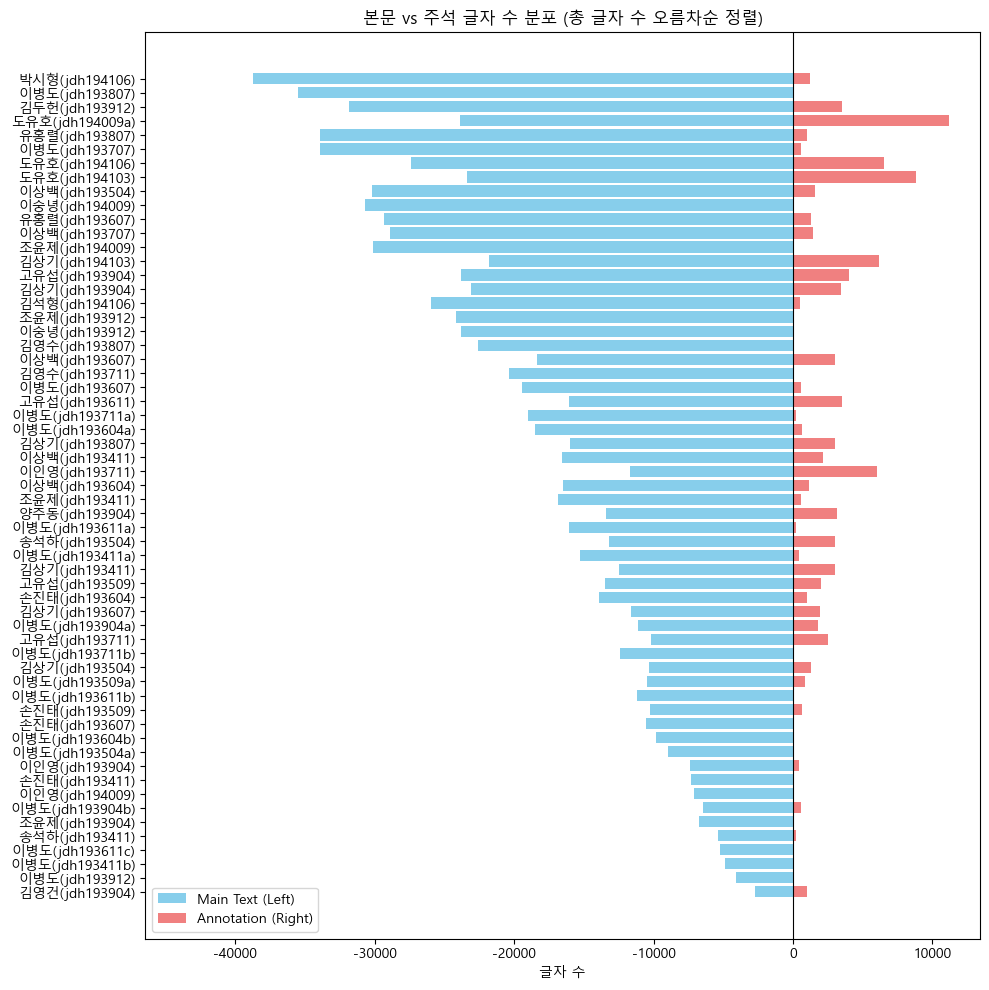

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.font_manager as fm # 폰트 관련 작업을 할 때 필요할 수 있음

# --- 한글 폰트 및 마이너스 부호 설정 ---
# 1. 사용할 한글 폰트 이름 지정 (시스템에 설치된 폰트 사용)
#    - Windows: 'Malgun Gothic'
#    - macOS: 'AppleGothic' 또는 'NanumGothic'
#    - Linux: 'NanumGothic' (설치 예: sudo apt-get install fonts-nanum)
font_name = 'Malgun Gothic'  # 윈도우 사용자 예시 (본인 환경에 맞게 수정)
# font_name = 'NanumGothic' # 나눔고딕 사용 예시

try:
    mpl.rcParams['font.family'] = font_name
    # 폰트 설정이 성공했는지 확인 (선택 사항)
    # current_font = plt.rcParams["font.family"]
    # print(f"현재 적용된 폰트: {current_font}")
except Exception as e:
    print(f"폰트 설정 오류 ('{font_name}'): {e}")
    print("기본 폰트로 실행됩니다. 한글이 깨질 수 있습니다. 폰트 이름을 확인하거나 다른 폰트를 지정해보세요.")

# 2. 마이너스 부호가 깨지지 않도록 ASCII 하이픈 사용 설정
mpl.rcParams['axes.unicode_minus'] = False


# --- 데이터 준비 ---
# 'TotalChars' 열 추가: 'CharCount_x'(본문)와 'CharCount_y'(각주)의 합계로 총 글자 수 계산
# (이전 코드에서 combined_char_count DataFrame이 준비되었다고 가정)
combined_char_count["TotalChars"] = (
    combined_char_count["CharCount_x"] + combined_char_count["CharCount_y"]
)

# 'TotalChars' 기준으로 정렬 (오름차순: 작은 값이 위로)
sorted_data = combined_char_count.sort_values(by="TotalChars", ascending=False)[::-1]

# 그래프에 사용할 데이터 추출
sections = sorted_data["TermId"]              # y축 항목 (예: 논문 ID)
main_text = sorted_data["CharCount_x"] * -1   # 본문 글자 수 (음수로 변환하여 그래프 왼쪽에 표시)
footnotes = sorted_data["CharCount_y"]        # 주석 글자 수 (양수로 그래프 오른쪽에 표시)

# --- 그래프 생성 ---
plt.figure(figsize=(10, 10)) # 그래프 크기 설정

# 1. 본문 데이터 가로 막대그래프 (왼쪽)
plt.barh(sections, main_text, color='skyblue', label='Main Text (Left)') # '본문 (왼쪽)'

# 2. 각주 데이터 가로 막대그래프 (오른쪽)
plt.barh(sections, footnotes, color='lightcoral', label='Annotation (Right)') # '각주 (오른쪽)'

# --- 그래프 꾸미기 ---
plt.axvline(0, color='black', linewidth=0.8) # 중앙선(x=0) 추가

# x축 레이블 설정 (한글로 변경 가능)
plt.xlabel('글자 수') # 'Character Count' -> '글자 수'
# 그래프 제목 설정 (한글로 변경 가능)
plt.title('본문 vs 주석 글자 수 분포 (총 글자 수 오름차순 정렬)') # 'Distribution of Main Text vs Footnotes (Sorted by Total Length)'

plt.xlim(-main_text.abs().max() * 1.2, footnotes.max() * 1.2) # x축 범위 설정
plt.legend(loc='lower left') # 범례 표시 (위치: 왼쪽 아래)

# --- 그래프 출력 ---
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 그래프를 화면에 표시

# 특징 추출

In [29]:
# 새로 업로드된 Excel 파일 구조 검사를 위해 파일 로드
features = 'data/features.xlsx' # 'data' 폴더 내 'JDH_Data.xlsx' 파일 경로 저장
feat_df = pd.read_excel(features, index_col = 0)
print(feat_df.shape)
feat_df.head()

(59, 10)


,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
1,이병도(jdh193411a),三韓問題의 新考察(一)-辰國及三韓考-,있음,25,NaN,NaN,NaN,NaN,1934.11,1
2,이상백(jdh193411),庶孽 差待의 淵源에 對한 一問題,없음,30,NaN,NaN,NaN,NaN,1934.11,1
3,조윤제(jdh193411),朝鮮詩歌의 胎生,있음,30,NaN,NaN,NaN,NaN,1934.11,1
4,김상기(jdh193411),古代의 貿易形態와 羅末의 海上發展에 就하야 (一)-淸海鎭大使張保皐를 主로 하야-,있음,27,NaN,NaN,NaN,NaN,1934.11,1
5,손진태(jdh193411),朝鮮 古代 山神의 性에 就하야,없음,11,NaN,NaN,NaN,NaN,1934.11,1


In [30]:
# 앞에서 산출한 글자 수 정보 불러오기

combined_char_count.head()
chars_info = combined_char_count.rename(columns = {'CharCount_x':'main_chars', 'CharCount_y':'anno_chars', 'TotalChars':'total_chars'})
print(chars_info.shape)
chars_info.head()

(59, 4)


,TermId,main_chars,anno_chars,total_chars
0,고유섭(jdh193509),13451,2021,15472
1,고유섭(jdh193611),16057,3484,19541
2,고유섭(jdh193711),10187,2544,12731
3,고유섭(jdh193904),23836,4024,27860
4,김두헌(jdh193912),31816,3531,35347


In [31]:
# 특성 df를 기사id로 정렬

feat_df_sorted = feat_df.sort_values('GisaId')
print(feat_df_sorted.shape)
feat_df_sorted.head()

(59, 10)


,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,23,NaN,NaN,NaN,NaN,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,31,NaN,NaN,NaN,NaN,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,17,NaN,NaN,NaN,NaN,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,41,NaN,NaN,NaN,NaN,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,51,NaN,NaN,NaN,NaN,1939.12,11


In [32]:
# 논문 전체 크기 삽입

feat_df_sorted_byf2 = feat_df_sorted.copy()
feat_df_sorted_byf2['f2_size'] = chars_info['total_chars'].tolist()
print(feat_df_sorted_byf2.shape)
feat_df_sorted_byf2.head()

(59, 10)


,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,NaN,NaN,NaN,NaN,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,NaN,NaN,NaN,NaN,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,NaN,NaN,NaN,NaN,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,NaN,NaN,NaN,NaN,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,NaN,NaN,NaN,NaN,1939.12,11


## 주석 관련 특성 마련

In [33]:
#1. 주석 개수
print(anno.shape)
anno.head()

(1057, 7)


,No,FootId,TermId,RawFtNo,RefSplit,FpClass,CharSize
0,1,고유섭(jdh193509)_1,고유섭(jdh193509),1,"槿域書畵徵에는 獻宗을 들지 않았으나, 高麗史에는「性聰彗九歲好書畵」라 하였고, 또「王...",FpAll,NaN
1,2,고유섭(jdh193509)_2,고유섭(jdh193509),2,"이 亦 槿域書畵徵에는 書家로서 만들었으나, 高麗史에는 「自少多才壽, 曉音律善書畵」라...",FpAll,NaN
2,3,고유섭(jdh193509)_3,고유섭(jdh193509),3,"金安老 龍泉談寂記에 「高麗忠宣王在燕邸,構萬巷堂, 召李齊賢置府中, 與元學士姚遂·閻復·...",FpAll,NaN
3,4,고유섭(jdh193509)_4,고유섭(jdh193509),4,그 例는 槿域書畵徵에서 찾아볼지어다.,FpAll,NaN
4,5,고유섭(jdh193509)_5,고유섭(jdh193509),5,"朝鮮金石總覽上, 智勒寺廣智大禪師墓誌.",FpAll,NaN


In [34]:
# 논설별 주석 개수
anno_by_term_count = anno.groupby('TermId')['RawFtNo'].agg('count')
anno_by_term_count['유홍렬(jdh193607)'] = anno_by_term_count['유홍렬(jdh193607)'] + 49 - 1
anno_by_term_count['이상백(jdh193504)'] = anno_by_term_count['이상백(jdh193504)'] + 69 - 1

print(anno_by_term_count.shape)
anno_by_term_count.head(10)

(42,)


TermId
고유섭(jdh193509)    17
고유섭(jdh193611)    53
고유섭(jdh193711)    21
고유섭(jdh193904)    25
김두헌(jdh193912)    90
김상기(jdh193411)    46
김상기(jdh193504)    22
김상기(jdh193607)    13
김상기(jdh193807)    20
김상기(jdh193904)    23
Name: RawFtNo, dtype: int64

In [35]:
chars_info.head()

,TermId,main_chars,anno_chars,total_chars
0,고유섭(jdh193509),13451,2021,15472
1,고유섭(jdh193611),16057,3484,19541
2,고유섭(jdh193711),10187,2544,12731
3,고유섭(jdh193904),23836,4024,27860
4,김두헌(jdh193912),31816,3531,35347


In [36]:
# 주석 관련 특성 마련

anno_temp_1 = pd.merge(chars_info, anno_by_term_count, how = 'left', left_on = 'TermId', right_on = anno_by_term_count.index)
anno_temp_2 = anno_temp_1.fillna('0')
anno_temp_2['RawFtNo'] = anno_temp_2['RawFtNo'].astype('int')
anno_temp_3 = anno_temp_2.rename(columns = {'RawFtNo':'anno_count'})
anno_temp_3.head()

,TermId,main_chars,anno_chars,total_chars,anno_count
0,고유섭(jdh193509),13451,2021,15472,17
1,고유섭(jdh193611),16057,3484,19541,53
2,고유섭(jdh193711),10187,2544,12731,21
3,고유섭(jdh193904),23836,4024,27860,25
4,김두헌(jdh193912),31816,3531,35347,90


In [37]:
# 주석의 상대개수
anno_temp_3['anno_rela_count'] = round(anno_temp_3['anno_count'] / anno_temp_3['total_chars'] * 100000, 2)
anno_temp_3.head()

# 주석의 상대크기
anno_temp_3['anno_rela_size'] = round(anno_temp_3['anno_chars'] / anno_temp_3['total_chars'] * 1000, 2)
anno_temp_3.head()

print(anno_temp_3.shape)

# 주석의 평균길이
anno_temp_3['anno_aver_length'] = round(anno_temp_3['anno_chars'] / anno_temp_3['anno_count'], 2)
anno_temp_3.head()


(59, 7)


,TermId,main_chars,anno_chars,total_chars,anno_count,anno_rela_count,anno_rela_size,anno_aver_length
0,고유섭(jdh193509),13451,2021,15472,17,109.88,130.62,118.88
1,고유섭(jdh193611),16057,3484,19541,53,271.22,178.29,65.74
2,고유섭(jdh193711),10187,2544,12731,21,164.95,199.83,121.14
3,고유섭(jdh193904),23836,4024,27860,25,89.73,144.44,160.96
4,김두헌(jdh193912),31816,3531,35347,90,254.62,99.90,39.23


In [38]:
# cf) 값 분포

anno_temp_4_boxplot = anno_temp_3.iloc[:, [0, 1, 2, 4, -1]]
anno_temp_4_boxplot.head()

,TermId,main_chars,anno_chars,anno_count,anno_aver_length
0,고유섭(jdh193509),13451,2021,17,118.88
1,고유섭(jdh193611),16057,3484,53,65.74
2,고유섭(jdh193711),10187,2544,21,121.14
3,고유섭(jdh193904),23836,4024,25,160.96
4,김두헌(jdh193912),31816,3531,90,39.23


In [39]:
import numpy as np
import pandas as pd # pandas DataFrame을 사용하고 있으므로 필요

# --- calculate_boxplot_min_max 함수 ---
def calculate_boxplot_min_max(data):
    """
    상자 그림에서 사용되는 최소값(Lower Whisker)과 최대값(Upper Whisker)을 계산합니다.
    (이상치를 제외한 범위 내의 최소/최대 값)

    Args:
        data (pandas.Series 또는 numpy.array): 숫자형 데이터 Series 또는 배열.

    Returns:
        tuple: (boxplot_min, boxplot_max) - 이상치를 제외한 최소값과 최대값.
               데이터가 너무 적거나 모든 값이 이상치인 경우 None을 반환할 수 있습니다.
    """
    # 데이터가 비어있는지 확인 (Pandas Series와 다른 iterable 모두 처리)
    if isinstance(data, pd.Series):
        if data.empty:
            return None, None
    elif not data:
        return None, None

    data = np.array(data)

    # 데이터에 4분위수를 계산할 만큼 충분한 데이터 포인트가 있는지 확인
    if len(data) < 2:
        if len(data) == 1:
            return data[0], data[0] # 데이터가 하나뿐이면 그 값이 최소이자 최대
        return None, None

    # 1. 사분위수(Q1, Q3) 계산
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # 2. 사분위수 범위(IQR) 계산
    IQR = Q3 - Q1

    # 3. 이상치 경계선 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 4. 이상치를 제외한 데이터 필터링
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    # 5. 필터링된 데이터에서 최소값과 최대값 찾기
    if len(filtered_data) > 0:
        boxplot_min = np.min(filtered_data)
        boxplot_max = np.max(filtered_data)
    else:
        boxplot_min = None
        boxplot_max = None
        # print("경고: 이상치를 제외한 유효한 데이터가 없습니다. 원본 데이터의 최소/최대값이 아닐 수 있습니다.") # 주석 처리 유지

    return boxplot_min, boxplot_max



# --- 각 숫자형 열의 주요 통계 (최대값, 중앙값, 최소값 순) ---
numerical_cols = ['main_chars', 'anno_chars', 'anno_count', 'anno_aver_length']

# 각 열의 중앙값 계산
all_medians = anno_temp_4_boxplot[numerical_cols].median()

# 각 열의 상자 그림 방식의 최소/최대값 계산
boxplot_min_values = {}
boxplot_max_values = {}

for col in numerical_cols:
    min_val, max_val = calculate_boxplot_min_max(anno_temp_4_boxplot[col].dropna())
    boxplot_min_values[col] = min_val
    boxplot_max_values[col] = max_val

print("--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---")

# 출력을 위한 DataFrame 생성 또는 수동 정렬
results = pd.DataFrame({
    'boxplot_max': boxplot_max_values,
    'median': all_medians,
    'boxplot_min': boxplot_min_values
})

# 원하는 순서대로 열 정렬 (max, median, min)
results = results[['boxplot_max', 'median', 'boxplot_min']]
print(results)

--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---
                  boxplot_max   median  boxplot_min
main_chars           38711.00  16057.0      2706.00
anno_chars            4024.00    633.0         0.00
anno_count              78.00     13.0         0.00
anno_aver_length       310.56     66.8        15.26


In [40]:
#!pip install seaborn

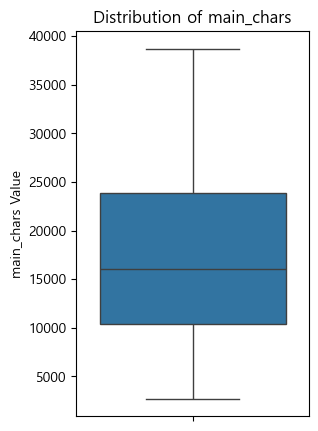

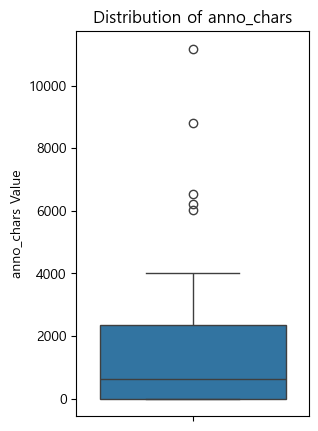

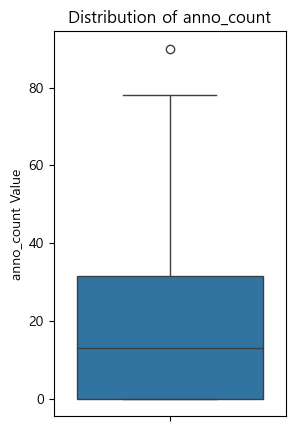

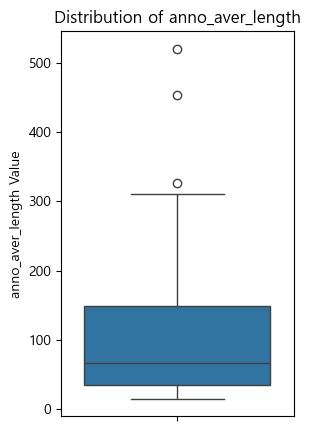

In [41]:

import seaborn as sns

# 'main_chars' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=anno_temp_4_boxplot['main_chars'])
plt.title('Distribution of main_chars')
plt.ylabel('main_chars Value')
plt.show()

# 'anno_chars' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=anno_temp_4_boxplot['anno_chars'])
plt.title('Distribution of anno_chars')
plt.ylabel('anno_chars Value')
plt.show()

# 'anno_count' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=anno_temp_4_boxplot['anno_count'])
plt.title('Distribution of anno_count')
plt.ylabel('anno_count Value')
plt.show()

# 'anno_aver_length' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=anno_temp_4_boxplot['anno_aver_length'])
plt.title('Distribution of anno_aver_length')
plt.ylabel('anno_aver_length Value')
plt.show()


In [42]:
# 특성 df에 채워넣기

feat_df_sorted_byf2.head()

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,NaN,NaN,NaN,NaN,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,NaN,NaN,NaN,NaN,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,NaN,NaN,NaN,NaN,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,NaN,NaN,NaN,NaN,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,NaN,NaN,NaN,NaN,1939.12,11


In [43]:
feat_df_sorted_byf2['f4_anno_count'] = anno_temp_3['anno_rela_count'].tolist()
feat_df_sorted_byf2['f5_anno_size'] = anno_temp_3['anno_rela_size'].tolist()
feat_df_sorted_byf2['f6_anno_length'] = anno_temp_3['anno_aver_length'].tolist()
print(feat_df_sorted_byf2.shape)
feat_df_sorted_byf2.head()

(59, 10)


,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,NaN,109.88,130.62,118.88,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,NaN,271.22,178.29,65.74,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,NaN,164.95,199.83,121.14,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,NaN,89.73,144.44,160.96,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,NaN,254.62,99.90,39.23,1939.12,11


In [44]:
# f1 현황

feat_df_sorted_byf2.groupby('f1_divider')['GisaId'].agg('count')

f1_divider
번호만     5
없음     12
있음     42
Name: GisaId, dtype: int64

## 자료 관련 특성 마련

- 구간별 한자 밀도 계산
- 공백 제외한 글자가 있는 Content 열을 대상으로 작업을 하려 한다.
- 목적은 한글(옛한글 포함) 대비 한자의 비율(여기서 '한자'는 한글과 다른 문자로서 한자 뿐 아니라 영어, 일본어, 기타 외국어도 모두 포함한다)
- 한자 비율은 구두점, 특수문자 등 모두 제외하고, 
- '한자' 개수 / (옛)한글, '한자' 등 전체 개수 
- 값을 소수점 한 자리가지 산출한 것을 말한다. (개수에서 공백은 처음부터 제외한다)

#### 구간별 한자 비율 구하기

##### 본문을 구간으로 나누기
- 50글자 기준

In [45]:
import re # 정규 표현식 모듈을 가져옵니다. 텍스트에서 특정 패턴을 찾거나 변경할 때 사용돼요.

# --- 정규식 패턴 정의 ---
# 다양한 문자 유형을 찾기 위한 정규식 패턴들을 미리 컴파일해서 준비해둡니다.
# 이렇게 하면 반복적으로 사용할 때 더 빠르게 동작해요.

# 한글 찾기 패턴: 완성형 한글 음절(가-힣), 한글 자모(ᄀ-ᇿ), 호환용 한글 자모(ㄱ-ㆎ)를 포함합니다.
hangul_pattern = re.compile(r'[가-힣ᄀ-ᇿㄱ-ㆎ]')

# 한자 찾기 패턴: 일반적인 한자(一-龥)와 숫자 0을 나타내는 한자(〇)를 포함합니다.
hanja_pattern = re.compile(r'[一-龥〇]')

# 히라가나 찾기 패턴: 일본어 히라가나 문자(ぁ-ん)를 찾습니다.
hiragana_pattern = re.compile(r'[ぁ-ん]')

# 가타카나 찾기 패턴: 일본어 가타카나 문자(ァ-ン)를 찾습니다.
katakana_pattern = re.compile(r'[ァ-ン]')

# 알파벳 찾기 패턴: 영어 대문자(A-Z)와 소문자(a-z)를 찾습니다.
alphabet_pattern = re.compile(r'[A-Za-z]')

# 숫자 찾기 패턴: 0부터 9까지의 숫자를 찾습니다.
number_pattern = re.compile(r'[0-9]')

# 특정 문자 제외 패턴: 아래 주석 처리된 함수들에서는 직접 사용되지 않지만,
# 단어 문자(\w - 알파벳, 숫자, 밑줄), 한글, 한자, 히라가나, 가타카나, 알파벳, 숫자를 제외한
# 다른 모든 문자를 찾는 패턴입니다. 특수 기호 등을 찾을 때 유용할 수 있어요.
exclude_pattern = re.compile(r'[^\w가-힣ᄀ-ᇿㄱ-ㆎ一-龥ぁ-んァ-ンA-Za-z0-9]')

# --- 함수 정의 ---

def preprocess_content(content: str) -> str:
    """
    입력된 문자열에서 모든 공백 문자를 제거합니다.
    예: "안 녕 하세요" -> "안녕하세요"

    Args:
        content (str): 전처리할 원본 문자열입니다.

    Returns:
        str: 공백이 제거된 문자열을 반환합니다.
    """
    # 문자열 내의 모든 공백(' ')을 빈 문자열('')로 치환합니다.
    # 이를 통해 구두점 등 다른 문자들은 그대로 유지하면서 공백만 제거할 수 있습니다.
    return content.replace(' ', '')

def split_into_grids(content: str, term_id: str, start_idx: int) -> tuple[list[str], list[str]]:
    """
    주어진 문자열(content)을 50글자 단위로 나누고, 각 부분에 대한 고유 ID를 생성합니다.
    논문이나 긴 텍스트를 특정 단위로 나누어 처리할 때 유용합니다.

    Args:
        content (str): 50글자 단위로 나눌 전체 문자열입니다.
        term_id (str): 생성될 ID의 접두사로 사용될 문자열입니다. (예: 'paper01')
        start_idx (int): ID 생성 시 시작 번호입니다. (예: 1)

    Returns:
        tuple[list[str], list[str]]: 생성된 ID 목록과 50글자 단위로 나누어진 문자열 목록의 튜플을 반환합니다.
                                      (예: (['paper01-0001', 'paper01-0002'], ['50글자내용1', '50글자내용2']))
    """
    # 1. content 문자열을 50글자씩 나누어 리스트로 만듭니다.
    #    range(0, len(content), 50)은 0부터 content 길이만큼 50씩 증가하는 숫자열을 만듭니다.
    #    예: content 길이가 120이면 i는 0, 50, 100이 됩니다.
    #    content[i:i+50]은 i번째부터 i+50번째 앞까지의 부분 문자열을 의미합니다.
    grids = [content[i:i+50] for i in range(0, len(content), 50)]

    # 2. 각 grid에 대한 고유 ID를 생성합니다.
    #    f-string을 사용하여 term_id와 순번(start_idx부터 시작)을 조합합니다.
    #    str(start_idx + idx).zfill(4)는 순번을 4자리 문자열로 만들고, 앞을 0으로 채웁니다. (예: 1 -> "0001")
    grid_ids = [f"{term_id}-{str(start_idx + idx).zfill(4)}" for idx in range(len(grids))]

    return grid_ids, grids

def calculate_hanja_ratio(grid: str) -> float:
    """
    주어진 문자열(grid) 내에서 특정 문자들의 비율을 계산합니다.
    여기서는 (한자 + 히라가나 + 가타카나 + 알파벳) / (한글 + 한자 + 히라가나 + 가타카나 + 알파벳) 비율을 계산합니다.
    결과는 소수점 둘째 자리까지 반올림됩니다.

    Args:
        grid (str): 비율을 계산할 대상 문자열입니다.

    Returns:
        float: 계산된 문자 비율을 반환합니다. 문자가 전혀 없는 경우 0.0을 반환합니다.
    """
    # 각 문자 유형별로 grid 내에 몇 개가 있는지 세어봅니다.
    # pattern.findall(grid)는 grid에서 pattern에 맞는 모든 부분을 찾아 리스트로 반환합니다.
    # len() 함수는 이 리스트의 길이를 반환하여 해당 문자의 개수를 얻습니다.
    hangul_count = len(hangul_pattern.findall(grid))      # 한글 개수
    hanja_count = len(hanja_pattern.findall(grid))        # 한자 개수
    hiragana_count = len(hiragana_pattern.findall(grid))  # 히라가나 개수
    katakana_count = len(katakana_pattern.findall(grid))  # 가타카나 개수
    alphabet_count = len(alphabet_pattern.findall(grid))  # 알파벳 개수

    # 비율 계산 시 분자에 해당하는 문자들(한글이 아닌 주요 외국 문자)의 총 개수를 계산합니다.
    non_hangul_text_count = hanja_count + hiragana_count + katakana_count + alphabet_count

    # 비율 계산 시 분모에 해당하는 문자들(한글 + 위에서 센 외국 문자)의 총 개수를 계산합니다.
    # 이 계산에는 숫자나 일반 특수기호는 포함되지 않습니다.
    total_relevant_chars = hangul_count + non_hangul_text_count

    # 분모가 0이면 (즉, 관련된 문자가 하나도 없으면) 0.0을 반환하여 0으로 나누는 오류를 방지합니다.
    if total_relevant_chars == 0:
        return 0.0

    # (한글 외 주요 문자 수) / (한글 + 한글 외 주요 문자 수) 비율을 계산하고,
    # round 함수를 사용해 소수점 둘째 자리까지 반올림합니다.
    ratio = non_hangul_text_count / total_relevant_chars
    return round(ratio, 2)

In [46]:
# 작업대상 불러오기
print(main_cleaned_count.shape)
main_cleaned_count.head()

(3680, 6)


,No,PhrId,TermId,Content,Content_Cleaned,CharCount
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...,1649
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,439
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...",743
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...",922
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...",112


##### 구간(단락)별 한자 비율

In [47]:
# 위 함수들을 실행하는 함수
def excute_hanja_ratio_by_50char(df):

    processed_data = []
    for term_id, group in df.groupby('TermId'):  # 논문별로 처리
        local_idx = 1  # 논문별로 일련번호 초기화
        for _, row in group.iterrows():
            content = preprocess_content(row['Content_Cleaned'])
            grid_ids, grids = split_into_grids(content, term_id, local_idx)
            local_idx += len(grids)  # 논문 내에서 구간 번호 유지
            for grid_id, grid in zip(grid_ids, grids):
                hanja_ratio = calculate_hanja_ratio(grid)
                processed_data.append({
                    'No': row['No'],
                    'TermId': term_id,
                    'GridID': grid_id,
                    'GridContent': grid,
                    'HanjaRatio': hanja_ratio
                })

    # 결과 데이터프레임 생성
    result = pd.DataFrame(processed_data)
    return result

In [48]:
# 50글자를 단위로 한자 비율 산출
hanja_ratio_by50 = excute_hanja_ratio_by_50char(main_cleaned_count)
hanja_ratio_by50

,No,TermId,GridID,GridContent,HanjaRatio
0,1,고유섭(jdh193509),고유섭(jdh193509)-0001,一般으로朝鮮文化方面이다그러하지만美術工藝品에있어서도文獻乃至遺跡이稀貴한中特히上古에있어서...,0.50
1,1,고유섭(jdh193509),고유섭(jdh193509)-0002,오히려無怪한편이나僅僅五百年前乃至千年前間의高麗의畫跡에있어서도그러함은奇怪를지나처摩訶不可...,0.52
2,1,고유섭(jdh193509),고유섭(jdh193509)-0003,이라할만하다.論者있어그理由를說明하여가로되或은兵禍不息을擧證하고或은藝道에對한一般의無敎無...,0.51
3,1,고유섭(jdh193509),고유섭(jdh193509)-0004,會하나前論은오히려事實에近似하지만後論은一段의檢討를經하여야할것이爲先筆者가當場에問題하고있...,0.48
4,1,고유섭(jdh193509),고유섭(jdh193509)-0005,藝道에對한愛好가凡論常識으로써議할바아니어서斷簡尺素散見되는記錄에서나마一大豪華版을그려낼수...,0.48
...,...,...,...,...,...
22419,3801,조윤제(jdh194009),조윤제(jdh194009)-0620,이없을뿐아니라또한發展도적다.春香傳異本이獄中花以後큰飛躍的發展이없었다는것은곧그러한社會情...,0.43
22420,3801,조윤제(jdh194009),조윤제(jdh194009)-0621,"주는것이아닌가하고보고있으나,여기에또앞날의朝鮮文學進路를暗示함이있는듯도하다.",0.21
22421,3802,조윤제(jdh194009),조윤제(jdh194009)-0622,끝으로本稿는于先이로써마감하고자하는데아직〿譯文春香傳의研究를남겨두었다.後日春香歌의研究와...,0.40
22422,3802,조윤제(jdh194009),조윤제(jdh194009)-0623,理하여發表할機會를얻고자하나이번에는本論文을씀에當하여普專圖書舘과李明善氏外諸氏로부터는貴重...,0.50


In [49]:
import pandas as pd

def generate_size_cls(df):
    # 1. GridContent 글자 수를 세어서 'size' 열에 입력
    df['size'] = df['GridContent'].apply(len)

    # 2. HanjaRatio에 따라 'cls' 열에 'data' 또는 'description' 입력
    df['cls'] = df['HanjaRatio'].apply(lambda x: 'sources' if x >= 0.9 else 'narration')

    # 결과 출력
    return df

In [50]:
hanja_ratio_by50 = hanja_ratio_by50.copy()
hanja_ratio_by50_classified = generate_size_cls(hanja_ratio_by50)
hanja_ratio_by50_classified

,No,TermId,GridID,GridContent,HanjaRatio,size,cls
0,1,고유섭(jdh193509),고유섭(jdh193509)-0001,一般으로朝鮮文化方面이다그러하지만美術工藝品에있어서도文獻乃至遺跡이稀貴한中特히上古에있어서...,0.50,50,narration
1,1,고유섭(jdh193509),고유섭(jdh193509)-0002,오히려無怪한편이나僅僅五百年前乃至千年前間의高麗의畫跡에있어서도그러함은奇怪를지나처摩訶不可...,0.52,50,narration
2,1,고유섭(jdh193509),고유섭(jdh193509)-0003,이라할만하다.論者있어그理由를說明하여가로되或은兵禍不息을擧證하고或은藝道에對한一般의無敎無...,0.51,50,narration
3,1,고유섭(jdh193509),고유섭(jdh193509)-0004,會하나前論은오히려事實에近似하지만後論은一段의檢討를經하여야할것이爲先筆者가當場에問題하고있...,0.48,50,narration
4,1,고유섭(jdh193509),고유섭(jdh193509)-0005,藝道에對한愛好가凡論常識으로써議할바아니어서斷簡尺素散見되는記錄에서나마一大豪華版을그려낼수...,0.48,50,narration
...,...,...,...,...,...,...,...
22419,3801,조윤제(jdh194009),조윤제(jdh194009)-0620,이없을뿐아니라또한發展도적다.春香傳異本이獄中花以後큰飛躍的發展이없었다는것은곧그러한社會情...,0.43,50,narration
22420,3801,조윤제(jdh194009),조윤제(jdh194009)-0621,"주는것이아닌가하고보고있으나,여기에또앞날의朝鮮文學進路를暗示함이있는듯도하다.",0.21,40,narration
22421,3802,조윤제(jdh194009),조윤제(jdh194009)-0622,끝으로本稿는于先이로써마감하고자하는데아직〿譯文春香傳의研究를남겨두었다.後日春香歌의研究와...,0.40,50,narration
22422,3802,조윤제(jdh194009),조윤제(jdh194009)-0623,理하여發表할機會를얻고자하나이번에는本論文을씀에當하여普專圖書舘과李明善氏外諸氏로부터는貴重...,0.50,50,narration


In [51]:
import pandas as pd
import io

# TermId와 class를 기준으로 size를 합산하고, class를 컬럼으로 분리합니다.
# 1. groupby()를 사용하여 'TermId'와 'class'별로 데이터를 그룹화합니다.
# 2. .agg({'size': 'sum'})을 사용하여 각 그룹의 'size' 열을 합산합니다.
# 3. .unstack()을 사용하여 'class' 레벨의 인덱스를 컬럼으로 변환합니다.
df_summed_by_class = hanja_ratio_by50_classified.groupby(['TermId', 'cls']).agg(
    sum_size=('size', 'sum') # 'sum_size'라는 이름으로 size의 합계를 구합니다.
).unstack(fill_value=0) # unstack 시 NaN 값은 0으로 채웁니다.

# 컬럼명 정리
# unstack() 결과로 다중 인덱스 컬럼이 생길 수 있으므로, 단일 레벨로 평탄화합니다.
df_summed_by_class.columns = [f"{col[1]}_size_sum" for col in df_summed_by_class.columns]

# TermId를 다시 일반 컬럼으로 변환 (선택 사항)
df_summed_by_class = df_summed_by_class.reset_index()

df_summed_by_class.head()

,TermId,narration_size_sum,sources_size_sum
0,고유섭(jdh193509),11236,2215
1,고유섭(jdh193611),15017,1040
2,고유섭(jdh193711),8402,1785
3,고유섭(jdh193904),21263,2574
4,김두헌(jdh193912),25075,6758


In [52]:
# --- 각 숫자형 열의 주요 통계 (최대값, 중앙값, 최소값 순) ---
numerical_cols = ['main_chars', 'anno_chars', 'anno_count', 'anno_aver_length']

# 각 열의 중앙값 계산
all_medians = anno_temp_4_boxplot[numerical_cols].median()

# 각 열의 상자 그림 방식의 최소/최대값 계산
boxplot_min_values = {}
boxplot_max_values = {}

for col in numerical_cols:
    min_val, max_val = calculate_boxplot_min_max(anno_temp_4_boxplot[col].dropna())
    boxplot_min_values[col] = min_val
    boxplot_max_values[col] = max_val

print("--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---")

# 출력을 위한 DataFrame 생성 또는 수동 정렬
results = pd.DataFrame({
    'boxplot_max': boxplot_max_values,
    'median': all_medians,
    'boxplot_min': boxplot_min_values
})

# 원하는 순서대로 열 정렬 (max, median, min)
results = results[['boxplot_max', 'median', 'boxplot_min']]
print(results)

--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---
                  boxplot_max   median  boxplot_min
main_chars           38711.00  16057.0      2706.00
anno_chars            4024.00    633.0         0.00
anno_count              78.00     13.0         0.00
anno_aver_length       310.56     66.8        15.26


In [53]:
# 자료 비중의 전체 본포 확인 (boxplot)

# --- 각 숫자형 열에 상자 그림 방식의 최소/최대값 적용 ---
numerical_cols = ['narration_size_sum', 'sources_size_sum']

# 각 열의 중앙값 계산
all_medians = df_summed_by_class[numerical_cols].median()

# 각 열의 상자 그림 방식의 최소/최대값 계산
boxplot_min_values = {}
boxplot_max_values = {}

for col in numerical_cols:
    min_val, max_val = calculate_boxplot_min_max(df_summed_by_class[col].dropna())
    boxplot_min_values[col] = min_val
    boxplot_max_values[col] = max_val

print("--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---")

# 출력을 위한 DataFrame 생성 또는 수동 정렬
results = pd.DataFrame({
    'boxplot_max': boxplot_max_values,
    'median': all_medians,
    'boxplot_min': boxplot_min_values
})

# 원하는 순서대로 열 정렬 (max, median, min)
results = results[['boxplot_max', 'median', 'boxplot_min']]
print(results)

--- 각 열의 주요 통계 (상자 그림 방식 최대값, 중앙값, 상자 그림 방식 최소값 순) ---
                    boxplot_max   median  boxplot_min
narration_size_sum        35225  14001.0            1
sources_size_sum           5600   1432.0            0


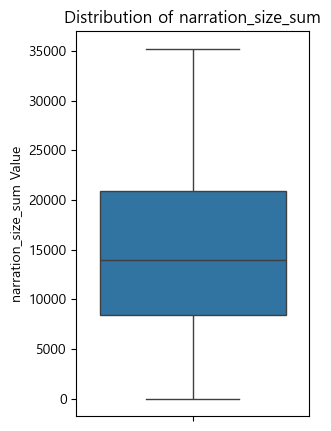

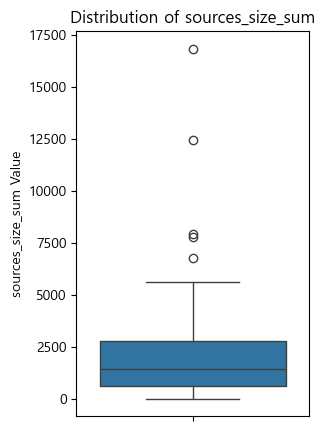

In [54]:
# 'narration_size_sum' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=df_summed_by_class['narration_size_sum'])
plt.title('Distribution of narration_size_sum')
plt.ylabel('narration_size_sum Value')
plt.show()

# 'sources_size_sum' 열에 대한 상자 그림
plt.figure(figsize=(3, 5))
sns.boxplot(y=df_summed_by_class['sources_size_sum'])
plt.title('Distribution of sources_size_sum')
plt.ylabel('sources_size_sum Value')
plt.show()

## 자료 특성 합치기

In [55]:
# 자료의 상대적 크기: 본문인용 자료 글자 수 / 본문 전체 글자 수

df_summed_by_class['source_rela_size'] = round(df_summed_by_class['sources_size_sum'] / (df_summed_by_class['narration_size_sum'] + df_summed_by_class['sources_size_sum']), 3)
df_summed_by_class_1 = df_summed_by_class.set_index('TermId')
df_summed_by_class_1

,narration_size_sum,sources_size_sum,source_rela_size
TermId,,,
고유섭(jdh193509),11236,2215,0.165
고유섭(jdh193611),15017,1040,0.065
고유섭(jdh193711),8402,1785,0.175
고유섭(jdh193904),21263,2574,0.108
김두헌(jdh193912),25075,6758,0.212
김상기(jdh193411),11532,917,0.074
김상기(jdh193504),8918,1432,0.138
김상기(jdh193607),10367,1262,0.109
김상기(jdh193807),14582,1416,0.089


In [56]:
# 특성 df 불러와 확인
print(feat_df_sorted_byf2.shape)
feat_df_sorted_byf2.head()

(59, 10)


,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,NaN,109.88,130.62,118.88,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,NaN,271.22,178.29,65.74,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,NaN,164.95,199.83,121.14,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,NaN,89.73,144.44,160.96,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,NaN,254.62,99.90,39.23,1939.12,11


In [57]:
df_summed_by_class.head()

,TermId,narration_size_sum,sources_size_sum,source_rela_size
0,고유섭(jdh193509),11236,2215,0.165
1,고유섭(jdh193611),15017,1040,0.065
2,고유섭(jdh193711),8402,1785,0.175
3,고유섭(jdh193904),21263,2574,0.108
4,김두헌(jdh193912),25075,6758,0.212


In [58]:
# 자료 상대크기를 삽입

feat_df_sorted_byf2['f3_src_size'] = df_summed_by_class_1['source_rela_size'].tolist()
feat_df_sorted_byf2_1 = feat_df_sorted_byf2.fillna('0')
feat_df_sorted_byf2_1

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11
4,김상기(jdh193411),古代의 貿易形態와 羅末의 海上發展에 就하야 (一)-淸海鎭大使張保皐를 主로 하야-,있음,15484,0.074,297.08,196.01,65.98,1934.11,1
10,김상기(jdh193504),古代의 貿易形態와 羅末의 海上發展에 就하야 (二)-淸海鎭大使張保皐를 主로 하야-,있음,11674,0.138,188.45,113.41,60.18,1935.04,2
23,김상기(jdh193607),葛文王考,번호만,13539,0.109,96.02,141.07,146.92,1936.07,5
35,김상기(jdh193807),三別抄와 그의 亂에 就하야 (1),있음,18999,0.089,105.27,158.01,150.1,1938.07,9


# 군집화

In [59]:
feat_df_sorted_byf2_2 = feat_df_sorted_byf2_1.set_index('GisaId', drop=True)
features_df = feat_df_sorted_byf2_2[['f1_divider', 'f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']].copy()
features_df.head()

,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length
GisaId,,,,,,
고유섭(jdh193509),있음,15472,0.165,109.88,130.62,118.88
고유섭(jdh193611),있음,19541,0.065,271.22,178.29,65.74
고유섭(jdh193711),없음,12731,0.175,164.95,199.83,121.14
고유섭(jdh193904),있음,27860,0.108,89.73,144.44,160.96
김두헌(jdh193912),있음,35347,0.212,254.62,99.90,39.23


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import io

print("--- 전처리 전 데이터 샘플 ---")
print(features_df.head())
print("\n--- f1_divider 값 분포 ---")
print(features_df['f1_divider'].value_counts())

# 4. 'f1_divider' 순서형 인코딩
# 순서: '없음' < '번호만' < '있음'
# OrdinalEncoder를 사용하여 정의된 순서대로 인코딩합니다.
# categories 매개변수를 사용하여 순서를 지정합니다.
encoder = OrdinalEncoder(categories=[['없음', '번호만', '있음']])
features_df['f1_encoded'] = encoder.fit_transform(features_df[['f1_divider']])

# 원본 'f1_divider' 열은 더 이상 필요 없으므로 제거합니다.
features_df_1 = features_df.drop('f1_divider', axis=1)

# 인코딩 후 데이터 타입 확인
print("\n--- f1 인코딩 후 데이터 샘플 ---")
print(features_df_1.head())

# 5. 수치형 특성 스케일링
# 'f1_encoded'를 제외한 모든 수치형 특성(f2_size, f3_src_size, f4_anno_count, f5_anno_size, f6_anno_length)에 StandardScaler 적용
numeric_features = ['f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']

scaler = StandardScaler()
features_df_1[numeric_features] = scaler.fit_transform(features_df_1[numeric_features])

# 전처리 완료된 데이터프레임 확인
print("\n--- 전처리 완료된 최종 데이터 샘플 (군집화에 사용될 데이터) ---")
print(features_df_1.head())
print("\n--- 전처리 완료된 데이터 통계 ---")
features_df_1.describe()

--- 전처리 전 데이터 샘플 ---
               f1_divider  f2_size  f3_src_size  f4_anno_count  f5_anno_size  \
GisaId                                                                         
고유섭(jdh193509)         있음    15472        0.165         109.88        130.62   
고유섭(jdh193611)         있음    19541        0.065         271.22        178.29   
고유섭(jdh193711)         없음    12731        0.175         164.95        199.83   
고유섭(jdh193904)         있음    27860        0.108          89.73        144.44   
김두헌(jdh193912)         있음    35347        0.212         254.62         99.90   

               f6_anno_length  
GisaId                         
고유섭(jdh193509)         118.88  
고유섭(jdh193611)          65.74  
고유섭(jdh193711)         121.14  
고유섭(jdh193904)         160.96  
김두헌(jdh193912)          39.23  

--- f1_divider 값 분포 ---
f1_divider
있음     42
없음     12
번호만     5
Name: count, dtype: int64

--- f1 인코딩 후 데이터 샘플 ---
                f2_size  f3_src_size  f4_anno_count  f5_anno_size  \
GisaId  

,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f1_encoded
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,59.000000
mean,9.785016e-17,-1.524204e-16,-7.526936e-18,-2.634428e-17,1.053771e-16,1.508475
std,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,0.817331
min,-1.571011e+00,-8.908868e-01,-1.000392e+00,-8.934207e-01,-7.308940e-01,0.000000
25%,-7.920335e-01,-5.347815e-01,-1.000392e+00,-8.934207e-01,-7.308940e-01,1.000000
50%,-1.431849e-01,-3.670294e-01,-1.222442e-01,-4.217858e-01,-3.726322e-01,2.000000
75%,8.447376e-01,1.980303e-01,5.697961e-01,6.850087e-01,3.745664e-01,2.000000
max,2.147104e+00,4.995151e+00,3.121086e+00,2.912174e+00,4.095431e+00,2.000000


In [61]:
features_df_1.head()

,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f1_encoded
GisaId,,,,,,
고유섭(jdh193509),-0.361572,0.080310,0.115239,0.566066,0.372478,2.0
고유섭(jdh193611),0.056011,-0.508294,1.753352,1.098709,-0.120735,2.0
고유섭(jdh193711),-0.642868,0.139170,0.674374,1.339387,0.393454,0.0
고유섭(jdh193904),0.909751,-0.255195,-0.089348,0.720485,0.763039,2.0
김두헌(jdh193912),1.678106,0.356953,1.584809,0.222815,-0.366785,2.0


In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler # 정규화를 하셨다고 했으므로 MinMaxScaler를 사용합니다.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

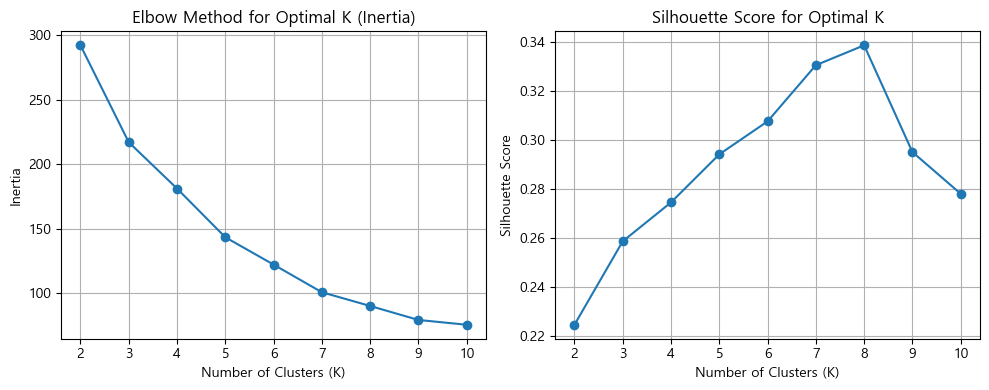


--- K-Means 군집화 결과 요약 ---
K = 2: Inertia = 292.13, Silhouette Score = 0.22
K = 3: Inertia = 216.99, Silhouette Score = 0.26
K = 4: Inertia = 181.11, Silhouette Score = 0.27
K = 5: Inertia = 143.34, Silhouette Score = 0.29
K = 6: Inertia = 122.14, Silhouette Score = 0.31
K = 7: Inertia = 100.72, Silhouette Score = 0.33
K = 8: Inertia = 90.08, Silhouette Score = 0.34
K = 9: Inertia = 79.23, Silhouette Score = 0.30
K = 10: Inertia = 75.51, Silhouette Score = 0.28


In [63]:
# 5. K-Means 군집화 및 최적 K 탐색
# K 값의 범위 설정 (2개부터 논설의 총 개수-1개까지)
# 일반적으로 K는 총 데이터 개수의 제곱근 근처에서 시작하는 경우가 많지만,
# 여기서는 2부터 10개까지의 K 값을 탐색해 봅시다. (데이터 59개이므로 최대 10개 정도면 충분)
k_range = range(2, 11) # K=2부터 K=10까지 탐색

inertia_values = []
silhouette_scores = []

for k in k_range:
    # KMeans 모델 초기화 및 학습
    # n_init='auto' 또는 명시적인 정수값 (예: 10)을 사용하여 안정적인 결과를 얻습니다.
    # random_state를 설정하여 결과를 재현 가능하게 합니다.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features_df_1) ###

    # 이너시아(Inertia) 기록
    inertia_values.append(kmeans.inertia_)

    # 실루엣 점수 계산 (군집이 1개일 때는 실루엣 점수를 계산할 수 없으므로 K > 1일 때만 계산)
    if k > 1: # K=1인 경우는 실루엣 점수를 계산할 수 없습니다.
        score = silhouette_score(features_df_1, kmeans.labels_)  ###
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0) # K=1일 경우 0으로 표시 (그래프 일관성 유지)


# 6. 결과 시각화: 엘보우 방법 그래프
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 그래프
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# 7. 결과 시각화: 실루엣 점수 그래프
# 실루엣 점수 리스트는 k_range와 길이가 다르므로, 2부터 시작하는 k_range에 맞춰 조정
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 그래프
# 실루엣 점수 그래프는 k가 2부터 시작하므로 k_range[1:]과 silhouette_scores[1:]를 사용합니다.
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout() # 그래프들이 겹치지 않도록 조정
plt.show()

# 최적의 K에 대한 추가 정보
print("\n--- K-Means 군집화 결과 요약 ---")
for i, k in enumerate(k_range):
    print(f"K = {k}: Inertia = {inertia_values[i]:.2f}, Silhouette Score = {silhouette_scores[i]:.2f}")


In [64]:
##
df = feat_df_sorted_byf2_1
df.head()

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol
No,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 14 to 52
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GisaId          59 non-null     object 
 1   Title           59 non-null     object 
 2   f1_divider      59 non-null     object 
 3   f2_size         59 non-null     int64  
 4   f3_src_size     59 non-null     float64
 5   f4_anno_count   59 non-null     float64
 6   f5_anno_size    59 non-null     float64
 7   f6_anno_length  59 non-null     object 
 8   f7_yymm         59 non-null     float64
 9   f8_vol          59 non-null     int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 5.1+ KB


In [66]:
features_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 고유섭(jdh193509) to 조윤제(jdh194009)
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   f2_size         59 non-null     float64
 1   f3_src_size     59 non-null     float64
 2   f4_anno_count   59 non-null     float64
 3   f5_anno_size    59 non-null     float64
 4   f6_anno_length  59 non-null     float64
 5   f1_encoded      59 non-null     float64
dtypes: float64(6)
memory usage: 5.3+ KB


In [67]:
#!pip install adjustText


--- K-Means 군집화 완료: 8개의 군집으로 나눔 ---
각 군집의 크기:
cluster_label
0     5
1    18
2    12
3    11
4     1
5     7
6     2
7     3
Name: count, dtype: int64

--- 각 군집별 특성 평균 (정규화된 값) ---
                f2_size  f3_src_size  f4_anno_count  f5_anno_size  \
cluster_label                                                       
0              0.190491     1.710742      -0.112660     -0.450435   
1              0.351429    -0.570098      -0.321686     -0.682111   
2              0.621502    -0.217916      -0.014544      1.033381   
3             -1.157916    -0.119816      -0.881462     -0.800894   
4             -1.571011     4.995151       1.202643      2.079522   
5              0.070129    -0.161859       1.872884      1.117959   
6             -0.778897     0.477617      -0.867792     -0.182449   
7              0.212925     0.274549       1.215673      0.466361   

               f6_anno_length  f1_encoded  
cluster_label                              
0                   -0.358339    2.00000

C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


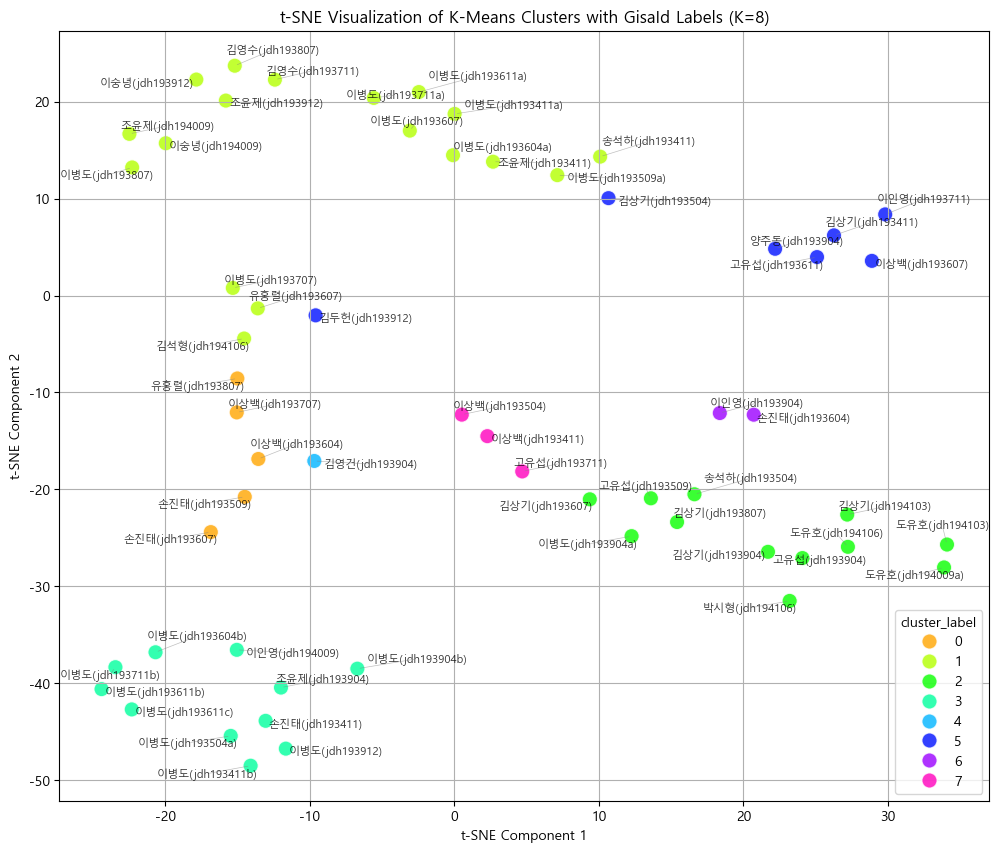


--- 군집 시각화 (adjustText 적용) 완료 ---


In [68]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler # MinMaxScaler 대신 StandardScaler 가정
import matplotlib.pyplot as plt
import io
import re

# --- 전제 조건: 사용자님의 환경에 아래 변수들이 이미 정의되어 있고 올바른 상태여야 합니다 ---
# 1. df: 원본 논설 제목 ('Title' 열)을 포함한 데이터프레임
# 2. features_df_1: 군집화에 사용될, 정규화되고 인코딩된 숫자 특성들만 담고 있는 데이터프레임
# 3. scaler: features_df_1을 스케일링하는 데 사용되었던 StandardScaler 객체 (학습된 상태)
# 4. encoder: f1_divider를 인코딩하는 데 사용되었던 OrdinalEncoder 객체 (학습된 상태)

# numeric_features 리스트는 df.info() 및 features_df_1.info()를 기반으로 명시적으로 정의합니다.
numeric_features = ['f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']

# --- K-Means 군집화 및 결과 분석 시작 ---

# 5. K-Means 군집화 (최적 K=8 적용)
n_clusters = 8

kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
# 군집화는 features_df_1의 스케일링된 특성들만을 사용합니다.
kmeans_final.fit(features_df_1[numeric_features + ['f1_encoded']])

# 각 논설에 군집 라벨 할당
df['cluster_label'] = kmeans_final.labels_
features_df_1['cluster_label'] = kmeans_final.labels_

print(f"\n--- K-Means 군집화 완료: {n_clusters}개의 군집으로 나눔 ---")
print(f"각 군집의 크기:\n{df['cluster_label'].value_counts().sort_index()}")

# 6. 각 군집의 특성 분석
print("\n--- 각 군집별 특성 평균 (정규화된 값) ---")
cluster_means = features_df_1.groupby('cluster_label')[numeric_features + ['f1_encoded']].mean()
print(cluster_means)

# 원본 스케일로 되돌려 평균을 보고 싶다면 (역변환)
print("\n--- 각 군집별 특성 평균 (원본 스케일로 역변환) ---")
original_scale_cluster_means = cluster_means.copy()

for i, col in enumerate(numeric_features):
    # StandardScaler의 역변환 공식 사용: X_original = X_scaled * std_dev + mean
    # scaler.scale_는 표준편차(std_dev)를, scaler.mean_은 평균(mean)을 나타냅니다.
    original_scale_cluster_means[col] = cluster_means[col] * scaler.scale_[i] + scaler.mean_[i]

# f1_encoded 역변환 (0 -> 없음, 1 -> 번호만, 2 -> 있음)
f1_categories = encoder.categories_[0]
original_scale_cluster_means['f1_encoded_category'] = original_scale_cluster_means['f1_encoded'].apply(
    lambda x: f1_categories[int(round(x))] if 0 <= round(x) < len(f1_categories) else 'Unknown'
)
original_scale_cluster_means = original_scale_cluster_means.drop('f1_encoded', axis=1)

print(original_scale_cluster_means)

# 7. 각 군집에 속하는 논설 제목 일부 출력
print("\n--- 각 군집별 논설 제목 샘플 ---")
for i in range(n_clusters):
    cluster_n_papers = df[df['cluster_label'] == i]
    print(f"\n--- 군집 {i} ({len(cluster_n_papers)}편) ---")
    for j, row in cluster_n_papers.head(5).iterrows():
        # df에 'Title' 열이 명확히 존재하므로 'Title' 열에 직접 접근합니다.
        print(f"- {row['Title']}")


# -------------------


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# adjustText 라이브러리 임포트 (설치되어 있어야 함)
# 설치되지 않았다면, 터미널/명령 프롬프트에서 'pip install adjustText' 실행
from adjustText import adjust_text

# --- (이전 K-Means 군집화 및 결과 분석 코드의 모든 내용이 여기에 있다고 가정) ---
# 즉, df, features_df_1, scaler, encoder, numeric_features, kmeans_final, n_clusters가
# 모두 이미 정의되고 실행된 상태여야 합니다.

# K-Means 군집화에 필요한 numeric_features 리스트는 명시적으로 정의합니다.
numeric_features = ['f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']

# --- 군집 시각화 (t-SNE 사용, adjustText로 라벨 겹침 조정) ---

print("\n--- 군집 시각화 시작 (t-SNE를 이용한 2D 플롯, adjustText 적용) ---")

tsne = TSNE(n_components=2, perplexity=min(5, len(features_df_1)-1), random_state=42, n_iter=2500, learning_rate='auto')

# 군집화에 사용된 특성 데이터(f1_encoded 포함)만 사용하여 t-SNE 적용
tsne_results = tsne.fit_transform(features_df_1[numeric_features + ['f1_encoded']])

# t-SNE 결과를 데이터프레임으로 변환
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne_1', 'tsne_2'])

# t-SNE 결과에 군집 라벨 추가
tsne_df['cluster_label'] = features_df_1['cluster_label'].values

# df의 GisaId와 Title을 tsne_df에 병합
tsne_df['GisaId'] = df['GisaId'].values
tsne_df['Title'] = df['Title'].values


# 시각화 기본 플롯
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='cluster_label',
    palette=sns.color_palette("hsv", n_colors=n_clusters),
    data=tsne_df,
    legend='full',
    alpha=0.8,
    s=120 # 점 크기 유지
)

plt.title('t-SNE Visualization of K-Means Clusters with GisaId Labels (K={})'.format(n_clusters))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)

# 텍스트 라벨 객체들을 저장할 리스트
texts = []

# 각 점 옆에 GisaId 라벨 출력 (adjustText에 전달하기 위해 텍스트 객체 생성)
for i in range(len(tsne_df)):
    # 점의 중앙에 가까운 위치에 텍스트를 배치한 후 adjust_text가 조정하도록 합니다.
    texts.append(plt.text(
        tsne_df['tsne_1'][i],
        tsne_df['tsne_2'][i],
        tsne_df['GisaId'][i], # GisaId를 라벨로 사용
        fontsize=8,
        alpha=0.8,
        ha='center', # 가로 정렬: 중앙
        va='center'  # 세로 정렬: 중앙
    ))

# adjust_text 함수를 사용하여 텍스트 라벨 겹침 조정
# arrowprops는 텍스트와 점을 연결하는 화살표를 그릴 때 사용 (선택 사항)
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.5), # 화살표 추가 (선택 사항)
            force_points=(0.2, 0.2), # 라벨이 점으로부터 밀려나는 힘 (x,y)
            force_text=(0.5, 0.5),   # 라벨이 라벨로부터 밀려나는 힘 (x,y)
            expand_points=(1.5, 1.5), # 라벨이 점과 라벨 주변으로 확장되는 비율
            expand_text=(1.5, 1.5)    # 텍스트끼리 밀어내는 간격
           )

plt.show()

print("\n--- 군집 시각화 (adjustText 적용) 완료 ---")

In [69]:
# 각 군집별 특성 평균

original_scale_cluster_means

,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f1_encoded_category
cluster_label,,,,,,
0,20851.400000,0.442000,87.434000,39.646000,40.140000,있음
1,22419.611111,0.054500,66.846667,18.911667,17.930000,있음
2,25051.250000,0.114333,97.097500,172.443333,188.930833,있음
3,7712.272727,0.131000,11.713636,8.280909,11.295455,없음
4,3687.000000,1.000000,216.980000,266.070000,122.620000,없음
5,19678.571429,0.123857,282.992857,180.012857,64.172857,있음
6,11405.500000,0.232500,13.060000,63.630000,486.500000,번호만
7,21070.000000,0.198000,218.263333,121.696667,62.153333,없음


In [70]:
df.head()

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label
No,,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3,2
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6,5
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8,7
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10,2
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11,5


In [71]:
# 저장될 텍스트 파일 이름 설정
output_filename = 'cluster_paper_titles.txt'

print(f"\n--- 각 군집별 논설 제목을 '{output_filename}' 파일로 저장 중 ---")

# 파일 열기 (쓰기 모드 'w', 인코딩은 'utf-8'로 한글 깨짐 방지)
with open(output_filename, 'w', encoding='utf-8') as f:
    f.write("=== 각 군집별 진단학보 논설 제목 ===\n\n")
    
    # 각 군집을 순회하며 제목을 파일에 씁니다.
    for i in range(n_clusters):
        # 현재 군집에 속하는 논설들을 필터링
        cluster_n_papers = df[df['cluster_label'] == i]
        
        # 군집 정보 (번호 및 논설 개수)를 파일에 씁니다.
        f.write(f"--- 군집 {i} ({len(cluster_n_papers)}편) ---\n")
        
        # 해당 군집의 모든 논설 제목을 파일에 씁니다.
        for j, row in cluster_n_papers.iterrows():
            f.write(f"- {row['GisaId']}, {row['Title']}\n") # 'GisaId', 'Title' 열의 내용을 씁니다.
            
        f.write("\n") # 각 군집 사이에 빈 줄을 넣어 구분합니다.

print(f"'{output_filename}' 파일 저장 완료. 파일을 열어 내용을 확인해주세요.")



--- 각 군집별 논설 제목을 'cluster_paper_titles.txt' 파일로 저장 중 ---
'cluster_paper_titles.txt' 파일 저장 완료. 파일을 열어 내용을 확인해주세요.


In [72]:
# 군집화 레이블 반영된 것 확인
df.head()

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label
No,,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3,2
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6,5
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8,7
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10,2
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11,5


# 군집별 특성 기여도


--- K-Means 군집화 완료: 8개의 군집으로 나눔 ---
각 군집의 크기:
cluster_label
0     5
1    18
2    12
3    11
4     1
5     7
6     2
7     3
Name: count, dtype: int64

--- 각 군집별 특성 평균 (정규화된 값) ---
                f2_size  f3_src_size  f4_anno_count  f5_anno_size  \
cluster_label                                                       
0              0.190491     1.710742      -0.112660     -0.450435   
1              0.351429    -0.570098      -0.321686     -0.682111   
2              0.621502    -0.217916      -0.014544      1.033381   
3             -1.157916    -0.119816      -0.881462     -0.800894   
4             -1.571011     4.995151       1.202643      2.079522   
5              0.070129    -0.161859       1.872884      1.117959   
6             -0.778897     0.477617      -0.867792     -0.182449   
7              0.212925     0.274549       1.215673      0.466361   

               f6_anno_length  f1_encoded  
cluster_label                              
0                   -0.358339    2.00000

C:\Users\USER\anaconda3\envs\py-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_29588\1381029414.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


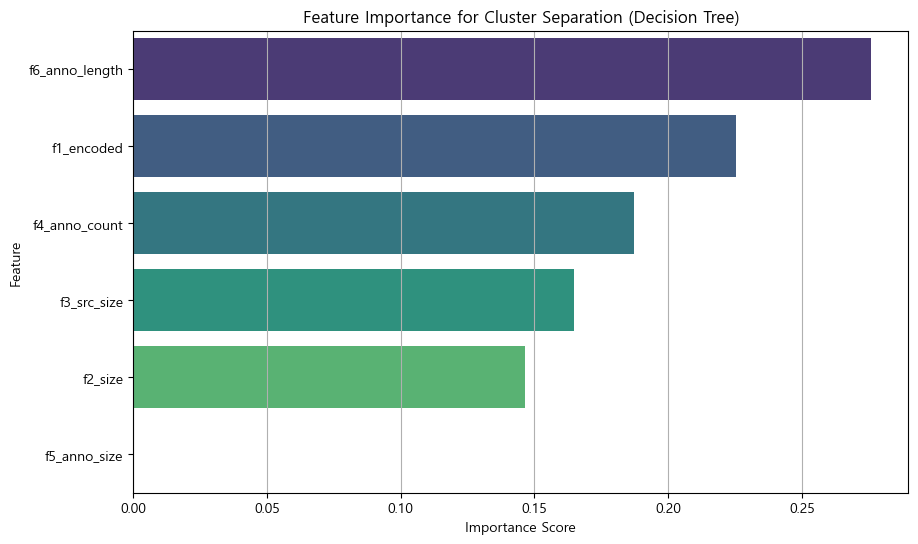


--- 특성 기여도 분석 완료 ---


In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler # MinMaxScaler 대신 StandardScaler 가정
import matplotlib.pyplot as plt
import io
import re

# --- 전제 조건: 사용자님의 환경에 아래 변수들이 이미 정의되어 있고 올바른 상태여야 합니다 ---
# 1. df: 원본 논설 제목 ('Title' 열)을 포함한 데이터프레임
# 2. features_df_1: 군집화에 사용될, 정규화되고 인코딩된 숫자 특성들만 담고 있는 데이터프레임
# 3. scaler: features_df_1을 스케일링하는 데 사용되었던 StandardScaler 객체 (학습된 상태)
# 4. encoder: f1_divider를 인코딩하는 데 사용되었던 OrdinalEncoder 객체 (학습된 상태)

# numeric_features 리스트는 df.info() 및 features_df_1.info()를 기반으로 명시적으로 정의합니다.
numeric_features = ['f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']

# --- K-Means 군집화 및 결과 분석 시작 ---

# 5. K-Means 군집화 (최적 K=8 적용)
n_clusters = 8

kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
# 군집화는 features_df_1의 스케일링된 특성들만을 사용합니다.
kmeans_final.fit(features_df_1[numeric_features + ['f1_encoded']])

# 각 논설에 군집 라벨 할당
df['cluster_label'] = kmeans_final.labels_
features_df_1['cluster_label'] = kmeans_final.labels_

print(f"\n--- K-Means 군집화 완료: {n_clusters}개의 군집으로 나눔 ---")
print(f"각 군집의 크기:\n{df['cluster_label'].value_counts().sort_index()}")

# 6. 각 군집의 특성 분석
print("\n--- 각 군집별 특성 평균 (정규화된 값) ---")
cluster_means = features_df_1.groupby('cluster_label')[numeric_features + ['f1_encoded']].mean()
print(cluster_means)

# 원본 스케일로 되돌려 평균을 보고 싶다면 (역변환)
print("\n--- 각 군집별 특성 평균 (원본 스케일로 역변환) ---")
original_scale_cluster_means = cluster_means.copy()

for i, col in enumerate(numeric_features):
    # StandardScaler의 역변환 공식 사용: X_original = X_scaled * std_dev + mean
    # scaler.scale_는 표준편차(std_dev)를, scaler.mean_은 평균(mean)을 나타냅니다.
    original_scale_cluster_means[col] = cluster_means[col] * scaler.scale_[i] + scaler.mean_[i]

# f1_encoded 역변환 (0 -> 없음, 1 -> 번호만, 2 -> 있음)
f1_categories = encoder.categories_[0]
original_scale_cluster_means['f1_encoded_category'] = original_scale_cluster_means['f1_encoded'].apply(
    lambda x: f1_categories[int(round(x))] if 0 <= round(x) < len(f1_categories) else 'Unknown'
)
original_scale_cluster_means = original_scale_cluster_means.drop('f1_encoded', axis=1)

print(original_scale_cluster_means)

# 7. 각 군집에 속하는 논설 제목 일부 출력
print("\n--- 각 군집별 논설 제목 샘플 ---")
for i in range(n_clusters):
    cluster_n_papers = df[df['cluster_label'] == i]
    print(f"\n--- 군집 {i} ({len(cluster_n_papers)}편) ---")
    for j, row in cluster_n_papers.head(5).iterrows():
        # df에 'Title' 열이 명확히 존재하므로 'Title' 열에 직접 접근합니다.
        print(f"- {row['Title']}")


# ----------------------------------------------------


# --- (사용자님의 기존 K-Means 군집화 및 결과 분석 코드의 마지막 부분) ---
# (예: print(original_scale_cluster_means) 이후, 또는 print(f"- {row['Title']}") 루프 이후)
# 이 부분부터 아래 코드를 붙여넣으세요.

import seaborn as sns # 시각화 라이브러리 추가 (이미 임포트되어 있다면 불필요)
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 분류기 임포트

# --- 8. 특성 기여도 분석 (의사결정나무 사용) ---

print("\n--- 특성 기여도 분석 시작 (의사결정나무) ---")

# 1. 피처(X)와 타겟(y) 데이터 준비
# features_df_1에서 'cluster_label' 열을 제외한 모든 특성들을 X로 사용합니다.
# numeric_features 리스트는 이미 위에서 정의되었으므로 그대로 사용합니다.
X = features_df_1[numeric_features + ['f1_encoded']]

# y (타겟): 의사결정나무가 예측해야 할 '정답'. K-Means 군집화 결과인 'cluster_label' 열입니다.
y = features_df_1['cluster_label']

# 2. 의사결정나무 분류기 모델 초기화 및 학습
# random_state를 설정하여 모델 학습 결과가 매번 동일하도록 합니다 (재현성).
# max_depth=5는 나무의 깊이를 5단계로 제한하여 너무 복잡해지는 것을 막습니다 (선택 사항).
# 데이터의 복잡성에 따라 이 값을 조절할 수 있습니다.
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X, y)

# 3. 특성 중요도 추출
# 학습된 모델이 각 특성에 부여한 중요도 점수 (0에서 1 사이, 합계 1)
feature_importances = dt_classifier.feature_importances_

# 4. 특성 중요도를 데이터프레임으로 정리하여 출력
feature_names = X.columns.tolist() # X 데이터프레임의 열 이름이 곧 특성 이름입니다.

# 특성 이름과 중요도 점수를 매핑하여 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도가 높은 순서로 정렬하여 보기 쉽게 합니다.
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n--- 각 특성의 군집 구분 기여도 (Feature Importance) ---")
print(importance_df)

# 5. 특성 중요도 시각화
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Cluster Separation (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x') # x축에 그리드 라인 추가
plt.show()

print("\n--- 특성 기여도 분석 완료 ---")

# 주요 특성으로 본 군집별 특징

In [74]:
# 군집화 기본 입력 자료 불러오기
features_df_1.head()

,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f1_encoded,cluster_label
GisaId,,,,,,,
고유섭(jdh193509),-0.361572,0.080310,0.115239,0.566066,0.372478,2.0,2
고유섭(jdh193611),0.056011,-0.508294,1.753352,1.098709,-0.120735,2.0,5
고유섭(jdh193711),-0.642868,0.139170,0.674374,1.339387,0.393454,0.0,7
고유섭(jdh193904),0.909751,-0.255195,-0.089348,0.720485,0.763039,2.0,2
김두헌(jdh193912),1.678106,0.356953,1.584809,0.222815,-0.366785,2.0,5


In [75]:
col_name = features_df_1.columns.tolist()[5:6] + features_df_1.columns.tolist()[:5]
print(col_name)

['f1_encoded', 'f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']


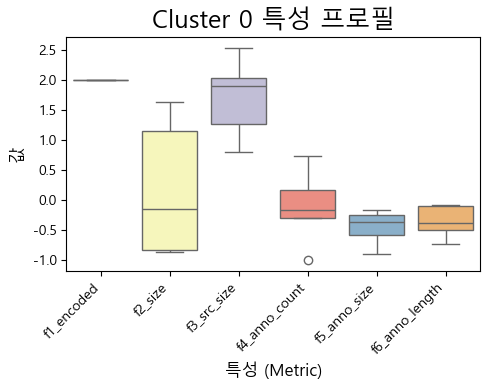

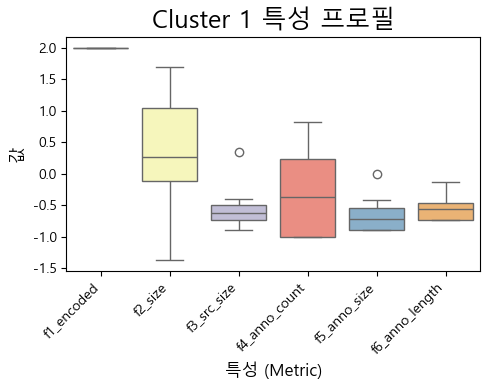

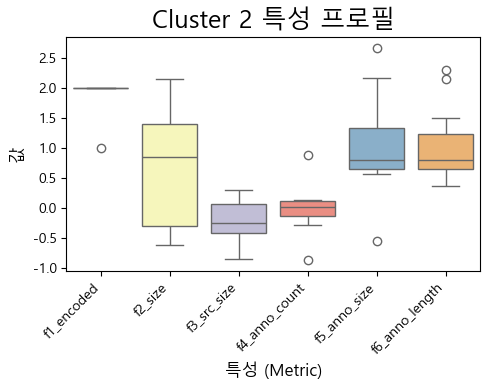

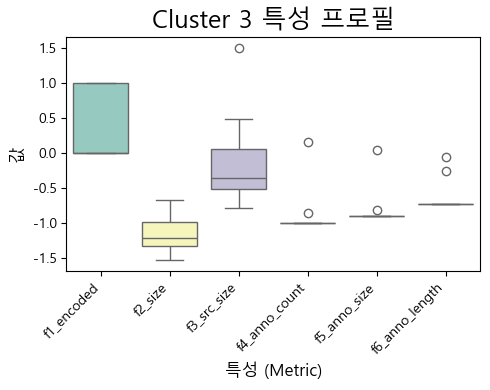

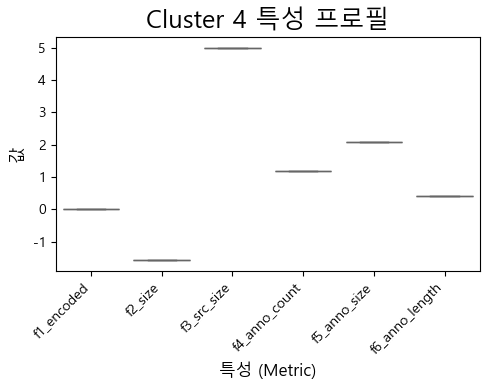

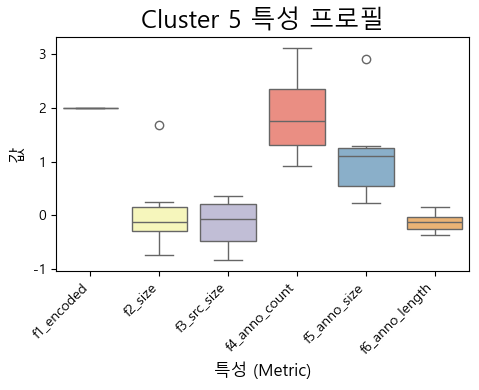

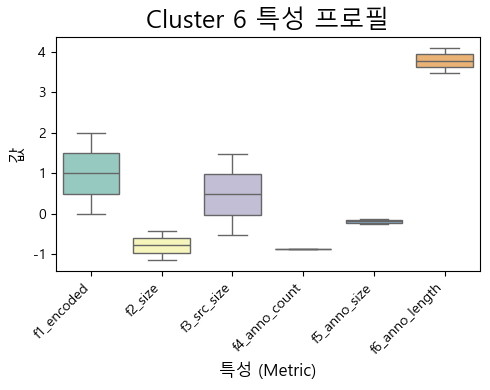

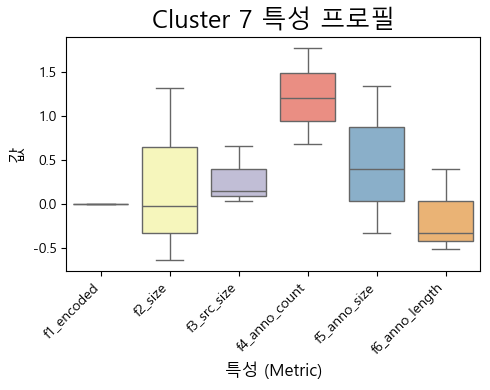

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# 실제 데이터프레임을 사용합니다.
# 이 예제에서는 제공된 코드를 기반으로 임의의 데이터프레임을 생성합니다.
# 실제 환경에서는 아래 라인을 주석 처리하고 원본 df를 사용하세요.

# 실제 데이터프레임을 사용합니다.
df = features_df_1 

# 한글 폰트 설정 (기존 코드와 동일)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: # Linux
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 1. 시각화를 위해 'wide' 포맷에서 'long' 포맷으로 데이터 재구성 (기존 코드와 동일)
df_melted = df.melt(id_vars=['cluster_label'], 
                    value_vars=['f1_encoded', 'f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length'],
                    var_name='metric', 
                    value_name='value')

# ✨ 수정된 부분: for 루프를 사용하여 클러스터별로 플롯을 순차적으로 생성합니다.
# 모든 클러스터의 고유한 ID를 가져옵니다.
cluster_ids = sorted(df_melted['cluster_label'].unique())

# 각 클러스터 ID에 대해 반복합니다.
for cluster_id in cluster_ids:
    # 2. 새 Figure 객체를 생성하여 각 플롯이 독립적으로 그려지도록 합니다.
    plt.figure(figsize=(5, 4))
    
    # 3. 현재 클러스터에 해당하는 데이터만 필터링합니다.
    cluster_data = df_melted[df_melted['cluster_label'] == cluster_id]
    
    # 4. 필터링된 데이터로 박스플롯을 생성합니다.
    sns.boxplot(data=cluster_data, x='metric', y='value', palette='Set3', hue='metric')
    
    # 5. 제목 및 레이블을 설정합니다.
    plt.title(f'Cluster {cluster_id} 특성 프로필', fontsize=18)
    plt.xlabel('특성 (Metric)', fontsize=12)
    plt.ylabel('값', fontsize=12)
    
    # x축 틱 레이블을 읽기 쉽게 45도 회전시킵니다.
    plt.xticks(rotation=45, ha='right')
    
    # 범례는 x축 레이블과 내용이 중복되므로 제거합니다.
    plt.legend([],[], frameon=False) 
    
    # 레이아웃을 조정하여 제목이나 레이블이 잘리지 않도록 합니다.
    plt.tight_layout()
    
    # 6. 완성된 플롯을 화면에 표시합니다. 이 창을 닫으면 다음 루프가 실행됩니다.
    plt.show()

# 주요 군집과 주요 필자의 관계
- 주요 군집: 1,2,3
- 주요 필자: 59편 중 3편 이상 집필자

In [77]:
feat_df_sorted_byf2_1.head()

,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label
No,,,,,,,,,,,
14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3,2
24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6,5
32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8,7
41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10,2
48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11,5


In [78]:
# 필자별 논설 수
feat_df_sorted_byf2_2 = feat_df_sorted_byf2_1.reset_index()
feat_df_sorted_byf2_2['writer'] = feat_df_sorted_byf2_2['GisaId'].apply(lambda x:x[:3])
writer = feat_df_sorted_byf2_2.groupby('writer').agg('count').sort_values('GisaId', ascending=False)
big_writer = writer.query('GisaId > 2')
big_writer

,No,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label
writer,,,,,,,,,,,,
이병도,17,17,17,17,17,17,17,17,17,17,17,17
김상기,6,6,6,6,6,6,6,6,6,6,6,6
이상백,5,5,5,5,5,5,5,5,5,5,5,5
고유섭,4,4,4,4,4,4,4,4,4,4,4,4
손진태,4,4,4,4,4,4,4,4,4,4,4,4
조윤제,4,4,4,4,4,4,4,4,4,4,4,4
도유호,3,3,3,3,3,3,3,3,3,3,3,3
이인영,3,3,3,3,3,3,3,3,3,3,3,3


In [79]:
# 
feat_df_sorted_byf2_2.head()

,No,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label,writer
0,14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3,2,고유섭
1,24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6,5,고유섭
2,32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8,7,고유섭
3,41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10,2,고유섭
4,48,김두헌(jdh193912),朝鮮妾制史小考,있음,35347,0.212,254.62,99.90,39.23,1939.12,11,5,김두헌


In [80]:

writer_cls = feat_df_sorted_byf2_2[feat_df_sorted_byf2_2['writer'].isin(big_writer.index)]
writer_cls.head()

,No,GisaId,Title,f1_divider,f2_size,f3_src_size,f4_anno_count,f5_anno_size,f6_anno_length,f7_yymm,f8_vol,cluster_label,writer
0,14,고유섭(jdh193509),高麗畵跡 對하야,있음,15472,0.165,109.88,130.62,118.88,1935.09,3,2,고유섭
1,24,고유섭(jdh193611),朝鮮塔婆의 研究,있음,19541,0.065,271.22,178.29,65.74,1936.11,6,5,고유섭
2,32,고유섭(jdh193711),佛敎가 高麗藝術 意欲에 끼친 影響의 一考察,없음,12731,0.175,164.95,199.83,121.14,1937.11,8,7,고유섭
3,41,고유섭(jdh193904),朝鮮塔婆 研究 (2),있음,27860,0.108,89.73,144.44,160.96,1939.04,10,2,고유섭
5,4,김상기(jdh193411),古代의 貿易形態와 羅末의 海上發展에 就하야 (一)-淸海鎭大使張保皐를 主로 하야-,있음,15484,0.074,297.08,196.01,65.98,1934.11,1,5,김상기


In [81]:
import pandas as pd

# 예시 데이터프레임 (사용하시는 실제 데이터프레임으로 대체하세요)
data = {
    'GisaId': [14, 24],
    'writer': ['고유섭', '고유섭'],
    'cluster_label': [32, 65]
}
df = pd.DataFrame(data)

df1 = writer_cls

pivot_df = df1.pivot_table(index='writer', columns='cluster_label', values='GisaId', aggfunc=list)
pivot_df.to_excel('result/writer_cluster.xlsx')

In [82]:
df1.columns

Index(['No', 'GisaId', 'Title', 'f1_divider', 'f2_size', 'f3_src_size',
       'f4_anno_count', 'f5_anno_size', 'f6_anno_length', 'f7_yymm', 'f8_vol',
       'cluster_label', 'writer'],
      dtype='object')

# 시기별 변화


--- 시기별 경향성 분석 시작 ---

--- 시기 구분 완료: 1937.07을 기준으로 초기/후기 분할 ---
period
Early (1934-1937.7)    26
Late (1937.8-1941)     20
Name: count, dtype: int64

--- 시기별 군집 분포 (비율) ---
cluster_label                0          1          2          3          5  \
period                                                                       
Early (1934-1937.7)  15.384615  26.923077   7.692308  23.076923  15.384615   
Late (1937.8-1941)    0.000000  20.000000  40.000000  25.000000   5.000000   

cluster_label               6         7  
period                                   
Early (1934-1937.7)  3.846154  7.692308  
Late (1937.8-1941)   5.000000  5.000000  


C:\Users\USER\AppData\Local\Temp\ipykernel_29588\1844089968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f6_anno_length'] = pd.to_numeric(df['f6_anno_length'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_29588\1844089968.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f6_anno_length'] = df['f6_anno_length'].fillna(0.0) # NaN 값 처리 (예: 0으로 채움)
C:\Users\USER\AppData\Local\Temp\ipykernel_29588\1844089968.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy o

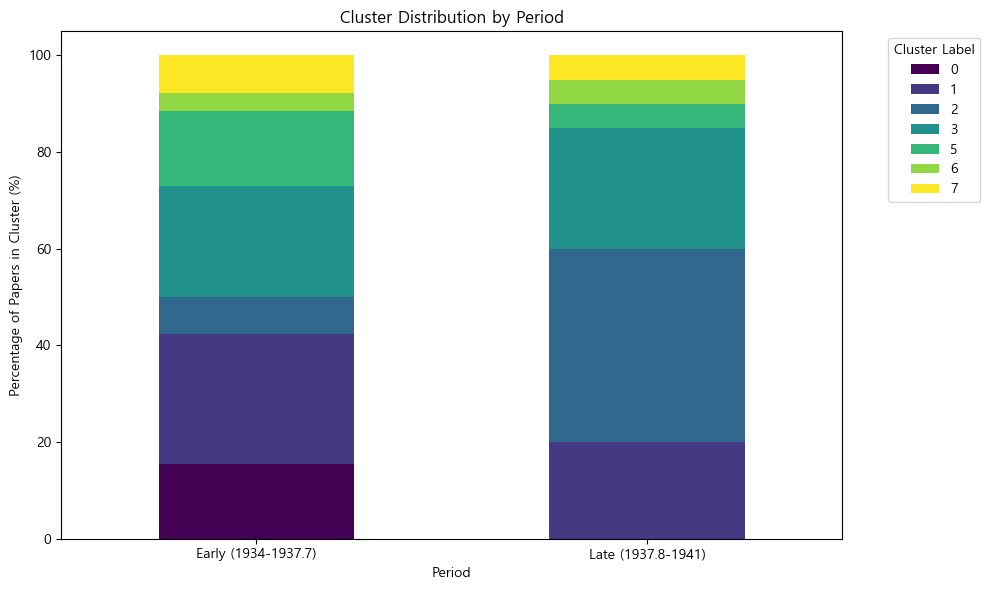


--- 시기별 특성 평균 변화 (원본 스케일) ---
                          f2_size  f3_src_size  f4_anno_count  f5_anno_size  \
period                                                                        
Early (1934-1937.7)  15912.730769     0.166269     109.551538     59.015385   
Late (1937.8-1941)   20009.550000     0.112650      79.222000    114.101000   

                     f6_anno_length  f1_divider_encoded_temp  
period                                                        
Early (1934-1937.7)       57.178077                 1.461538  
Late (1937.8-1941)       120.307500                 1.350000  


C:\Users\USER\AppData\Local\Temp\ipykernel_29588\1844089968.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f1_divider_encoded_temp'] = encoder.transform(df[['f1_divider']])


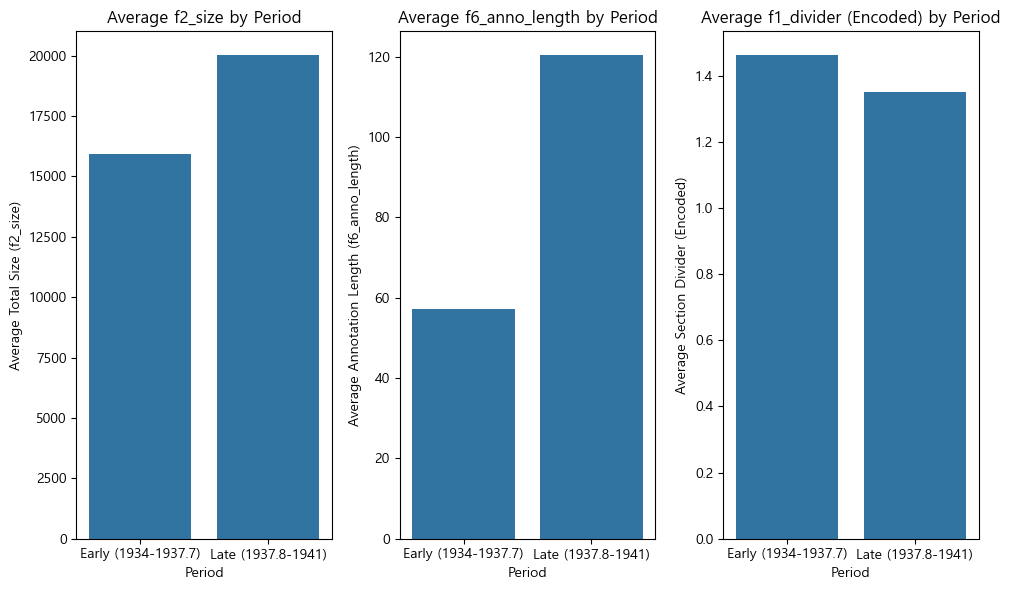


--- 시기별 경향성 분석 완료 ---


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

def periodic_change(df):
    # --- 전제 조건: 사용자님의 환경에 아래 변수들이 이미 정의되어 있어야 합니다 ---
    # 1. df: 원본 논설 제목 ('Title' 열), 'f7_yymm' (발행 연월), 'cluster_label', 'f6_anno_length' (object) 등을 포함한 데이터프레임
    # 2. n_clusters: K-Means 군집 개수 (현재 8)
    # 3. numeric_features: 수치형 특성 열 이름 리스트 (예: ['f2_size', 'f3_src_size', ...])
    # 4. encoder: f1_divider를 인코딩하는 데 사용되었던 OrdinalEncoder 객체 (학습된 상태)
    # 5. scaler: features_df_1을 스케일링하는 데 사용되었던 StandardScaler 객체 (학습된 상태)
    
    # numeric_features 리스트는 이전 단계에서 정의되었으므로 다시 정의할 필요는 없지만,
    # 이 코드 블록에서 사용하기 위해 명시적으로 가져옵니다.
    numeric_features = ['f2_size', 'f3_src_size', 'f4_anno_count', 'f5_anno_size', 'f6_anno_length']
    
    
    # --- 1934-1941 시기별 경향성 분석 ---
    
    print("\n--- 시기별 경향성 분석 시작 ---")
    
    # ===> 수정된 부분: f6_anno_length를 float으로 변환 <===
    # f6_anno_length 열에 숫자로 변환 불가능한 값이 있을 경우를 대비하여 errors='coerce' 사용
    # 이는 변환 실패 시 NaN으로 만들고, 이후 fillna(0.0)으로 처리합니다.
    df['f6_anno_length'] = pd.to_numeric(df['f6_anno_length'], errors='coerce')
    df['f6_anno_length'] = df['f6_anno_length'].fillna(0.0) # NaN 값 처리 (예: 0으로 채움)
    
    # 1. 시기 구분 기준 설정
    split_year_month = 1937.07 
    
    # 'period' 열 생성 (초기 또는 후기)
    df['period'] = df['f7_yymm'].apply(lambda x: 'Early (1934-1937.7)' if x <= split_year_month else 'Late (1937.8-1941)')
    
    print(f"\n--- 시기 구분 완료: {split_year_month}을 기준으로 초기/후기 분할 ---")
    print(df['period'].value_counts())
    
    # 2. 시기별 군집 분포 분석
    print("\n--- 시기별 군집 분포 (비율) ---")
    period_cluster_distribution = pd.crosstab(df['period'], df['cluster_label'], normalize='index') * 100
    print(period_cluster_distribution)
    
    # 시각화: 시기별 군집 분포 막대 그래프
    period_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title('Cluster Distribution by Period')
    plt.xlabel('Period')
    plt.ylabel('Percentage of Papers in Cluster (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # 3. 시기별 특성 평균 변화 분석
    print("\n--- 시기별 특성 평균 변화 (원본 스케일) ---")
    
    # 'f1_divider'를 수치형으로 변환 (이 분석 내에서만 임시 사용)
    # 이전에 encoder가 학습되었으므로, encoder를 사용하여 변환합니다.
    df['f1_divider_encoded_temp'] = encoder.transform(df[['f1_divider']])
    
    # 분석할 특성들 (numeric_features와 f1_divider_encoded_temp 포함)
    # f6_anno_length는 이제 numeric_features에 포함되어 있고 float으로 변환되었으므로 그대로 사용합니다.
    analysis_features = numeric_features + ['f1_divider_encoded_temp']
    
    # 시기별 특성 평균 계산
    period_feature_means = df.groupby('period')[analysis_features].mean()
    print(period_feature_means)
    
    # 시각화: 시기별 주요 특성 변화
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 3, 1) # 1행 3열 중 첫 번째
    sns.barplot(x='period', y='f2_size', data=df, errorbar=None)
    plt.title('Average f2_size by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Total Size (f2_size)')
    
    plt.subplot(1, 3, 2) # 1행 3열 중 두 번째
    sns.barplot(x='period', y='f6_anno_length', data=df, errorbar=None)
    plt.title('Average f6_anno_length by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Annotation Length (f6_anno_length)')
    
    plt.subplot(1, 3, 3) # 1행 3열 중 세 번째
    sns.barplot(x='period', y='f1_divider_encoded_temp', data=df, errorbar=None)
    plt.title('Average f1_divider (Encoded) by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Section Divider (Encoded)')
    plt.tight_layout()
    plt.show()
    
    print("\n--- 시기별 경향성 분석 완료 ---")

periodic_change(df1)

# The End of Note